In [7]:
import pandas as pd
import numpy as np
# import nltk
import re
import csv
np.random.seed(500)

import warnings
warnings.simplefilter(action ="ignore")
# Import the necessary packages
import numpy as np
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import six
#import sys
#sys.modules['sklearn.externals.six'] = six
#import mlrose
#import missingno as msno
# Model Stacking
from sklearn.ensemble import StackingClassifier
# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
# from scipy import interp
from itertools import cycle
# from yellowbrick.classifier import ConfusionMatrix
# from yellowbrick.classifier import ClassificationReport
# from yellowbrick.classifier import ROCAUC
# from yellowbrick.classifier import DiscriminationThreshold
# from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from mlxtend.classifier import StackingCVClassifier
# #from deepforest import CascadeForestClassifier
# from mlxtend.plotting import plot_confusion_matrix

In [8]:
# importing necessary libraries

import pandas as pd # for data manipulation and analysis
import collections # for creating and manipulating Python's collections like OrderedDict, defaultdict, Counter, etc.
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization

# Classifier Libraries 
from sklearn.linear_model import LogisticRegression # for implementing logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier # for implementing decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # for implementing random forest algorithm
from sklearn.svm import SVC # for implementing Support Vector Machine (SVM) algorithm
from sklearn.naive_bayes import GaussianNB # for implementing Naive Bayes algorithm
from sklearn.neighbors import KNeighborsClassifier # for implementing K-Nearest Neighbors (KNN)  algorithm


# For Statistical testing
from scipy.stats import ttest_ind # for computing t-test for two independent samples
import statsmodels.api as sm # for statistical models and tests
from scipy.stats import chi2_contingency # for computing chi-square statistic and p-value for a contingency table
import scipy.stats as stats # for implementing skewness and other stats


# Other Libraries
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from sklearn.pipeline import make_pipeline # for building a pipeline of transforms with a final estimator
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline # for building a pipeline with imbalanced datasets
from imblearn.over_sampling import SMOTE # for oversampling imbalanced datasets using Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.under_sampling import NearMiss # for undersampling imbalanced datasets using NearMiss algorithm
from imblearn.metrics import classification_report_imbalanced # for generating a classification report for imbalanced datasets
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report # for computing various performance metrics for classification models
from collections import Counter # for counting the frequency of elements in a list
from sklearn.model_selection import KFold, StratifiedKFold # for k-fold cross-validation
from sklearn.model_selection import cross_val_score # for evaluating a model using cross-validation
from sklearn.metrics import cohen_kappa_score # for computing Cohen's kappa score for inter-rater agreement

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) # for setting the maximum number of columns to display in pandas dataframes


In [9]:
#   first read the data file
df= pd.read_csv('F:\Hypertension Plos one\Dataset\Hyper.csv')

In [10]:
df.shape

(26083, 14)

In [11]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  57.0  1.0   3       145   233    1        0      150      0      2.3   
1  64.0  0.0   2       130   250    0        1      187      0      3.5   
2  52.0  1.0   1       130   204    0        0      172      0      1.4   
3  56.0  0.0   1       120   236    0        1      178      0      0.8   
4  66.0  0.0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

In [12]:
# Print summary statistics
df.describe()

age          sex            cp      trestbps          chol  \
count  26083.000000  26058.00000  26083.000000  26083.000000  26083.000000   
mean      55.661389      0.50000      0.958594    131.592992    246.246061   
std       15.189768      0.50001      1.023931     17.588809     51.643522   
min       11.000000      0.00000      0.000000     94.000000    126.000000   
25%       44.000000      0.00000      0.000000    120.000000    211.000000   
50%       56.000000      0.50000      1.000000    130.000000    240.000000   
75%       67.000000      1.00000      2.000000    140.000000    275.000000   
max       98.000000      1.00000      3.000000    200.000000    564.000000   

                fbs       restecg       thalach         exang       oldpeak  \
count  26083.000000  26083.000000  26083.000000  26083.000000  26083.000000   
mean       0.149753      0.526512    149.655024      0.326573      1.039512   
std        0.356836      0.525641     22.858109      0.468969      1.165138   
min        0.000000      0.000000     71.000000      0.000000      0.000000   
25%        0.000000      0.000000    133.000000      0.000000      0.000000   
50%        0.000000      1.000000    153.000000      0.000000      0.800000   
75%        0.000000      1.000000    166.000000      1.000000      1.600000   
max        1.000000      2.000000    202.000000      1.000000      6.200000   

              slope            ca          thal        target  
count  26083.000000  26083.000000  26083.000000  26083.000000  
mean       1.400299      0.721849      2.318752      0.547253  
std        0.616513      1.011608      0.604659      0.497772  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      2.000000      0.000000  
50%        1.000000      0.000000      2.000000      1.000000  
75%        2.000000      1.000000      3.000000      1.000000  
max        2.000000      4.000000      3.000000      1.000000

In [13]:
# the complete information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [14]:
from scipy.stats import zscore
df_ol=df

# Calculate Z-scores for each feature in the dataset
z_scores = zscore(df_ol)

# Find outliers (Z-scores > 3 or < -3 are often considered outliers)
outliers = (z_scores > 3) | (z_scores < -3)

# Create a mask to keep rows without outliers
keep_rows = ~outliers.any(axis=1)

# Remove rows with outliers from both X_train and y_train
df_new= df_ol[keep_rows]

In [15]:
num_rows_before_X = df_ol.shape[0]
print(f"Number of rows before removing outliers for X: {num_rows_before_X}")
num_rows_after_X = df_new.shape[0]
print(f"Number of rows after removing outliers for X: {num_rows_after_X}")

Number of rows before removing outliers for X: 26083
Number of rows after removing outliers for X: 24783


In [16]:
df_new.shape
df = df_new
df.shape

(24783, 14)

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

     Feature  Importance
7    thalach    0.143845
2         cp    0.136702
11        ca    0.126853
12      thal    0.126491
9    oldpeak    0.126079
4       chol    0.104917
3   trestbps    0.086561
8      exang    0.063018
10     slope    0.048769
6    restecg    0.023711
5        fbs    0.010557
0        age    0.001317
1        sex    0.001181


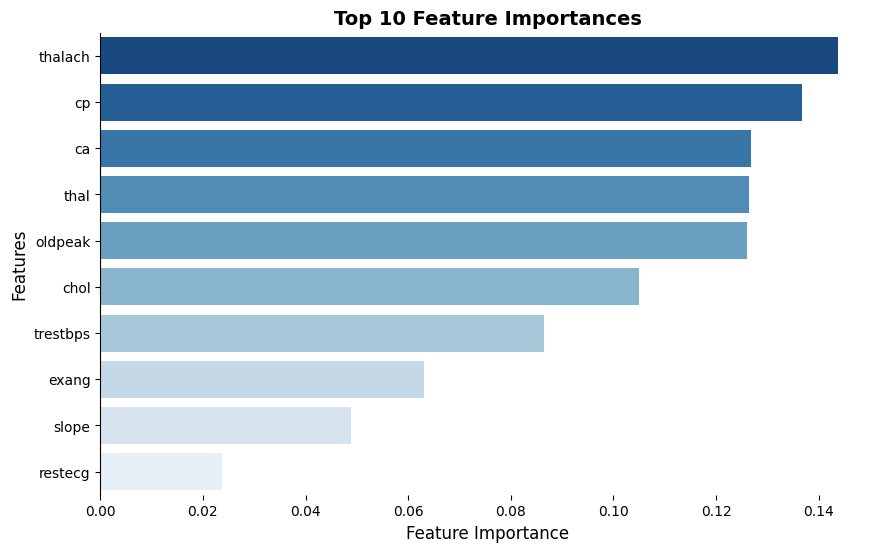

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot the top 10 features based on importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importance_df["Importance"][:10], 
    y=importance_df["Feature"][:10], 
    palette="Blues_r"
)

plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 10 Feature Importances", fontweight="bold", fontsize=14)

# Remove unnecessary spines for a cleaner look
sns.despine(left=False, bottom=True)

# Show the plot
plt.show()

# Save the figure
plt.savefig("Top10Features.png", dpi=600, bbox_inches="tight")


In [19]:
#columns name
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
#Checking Null 
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(df.isnull().values.sum())

# Replace the ' 's with NaN
df = df.replace(" ",np.nan)

# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())



25
25


In [21]:
# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df.copy()

# Rename values in the 'Result' column just for the plot
df_copy['target'] = df_copy['target'].replace({0: 'No Hypertension', 1: 'Hypertension'})
# Rename values in the 'Gender' column
df_copy['sex'] = df_copy['sex'].replace({0: 'Male', 1: 'Female'})


# Define custom hex colors
custom_colors = ['#B43757', '#a37b85']
custom_colors_gender = ['#90ADC6', '#C6A990']


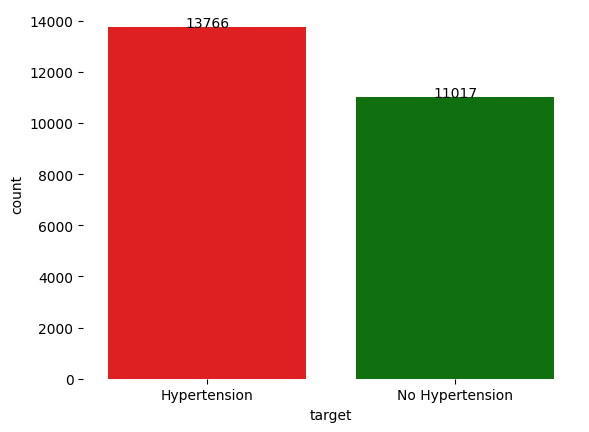

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


custom_colors = {'No Hypertension': 'green', 'Hypertension': 'red'}

# Create a count plot of the target result with specified colors
ax = sns.countplot(x='target', data=df_copy, palette=custom_colors)

# plt.title('Count of Hypertension Result')

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:d}'.format(int(p.get_height())), ha='center')

# Remove spines
sns.despine(left=True, bottom=True)

# plt.show()
plt.savefig('Hypertension_count.png', dpi=600)

# plt.close()


In [23]:
# Count the number of occurrences of each unique value in the 'Result' column
result_counts = df_copy['target'].value_counts()

# Print the counts of the two categories
print(result_counts)

# Check if the two categories are balanced or not
if result_counts[0] == result_counts[1]:
    print('The two categories are balanced.')
else:
    print('The two categories are not balanced.')
    
print("-----")    
# The classes are heavily skewed we need to solve this issue later.
print('Non Anemic', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Anemic', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')   
    

target
Hypertension       13766
No Hypertension    11017
Name: count, dtype: int64
The two categories are not balanced.
-----
Non Anemic 44.45 % of the dataset
Anemic 55.55 % of the dataset


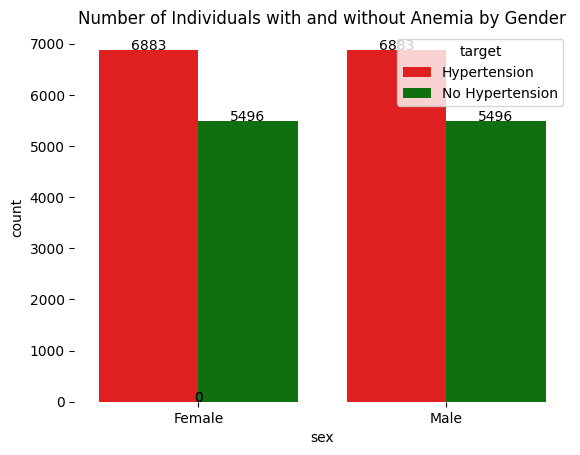

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot of the target result
ax = sns.countplot(x='sex', hue='target', data=df_copy, palette=custom_colors)
plt.title('Number of Individuals with and without Anemia by Gender')

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:d}'.format(int(p.get_height())), ha='center')

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

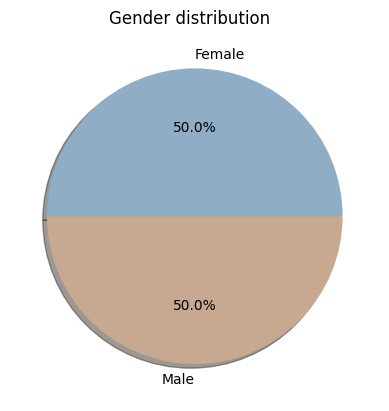

In [25]:
result_counts = df_copy['sex'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors_gender, shadow=True)
plt.title('Gender distribution  ')
plt.show()

In [26]:
df_copy.head()

age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  57.0  Female   3       145   233    1        0      150      0      2.3   
1  64.0    Male   2       130   250    0        1      187      0      3.5   
2  52.0  Female   1       130   204    0        0      172      0      1.4   
3  56.0    Male   1       120   236    0        1      178      0      0.8   
4  66.0    Male   0       120   354    0        1      163      1      0.6   

   slope  ca  thal        target  
0      0   0     1  Hypertension  
1      0   0     2  Hypertension  
2      2   0     2  Hypertension  
3      2   0     2  Hypertension  
4      2   0     2  Hypertension

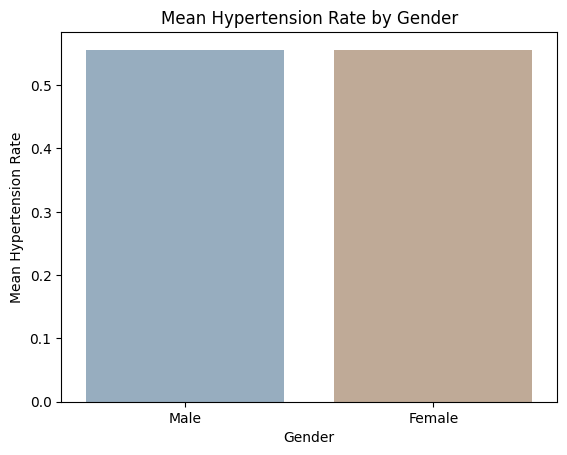

In [27]:
hypertension_rates = df.groupby('sex')['target'].mean().reset_index()

ax = sns.barplot(x='sex', y='target', data=hypertension_rates, palette=custom_colors_gender)
ax.set_xticklabels(['Male', 'Female'])
plt.title('Mean Hypertension Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Hypertension Rate')
plt.show()

In [28]:
hypertension_rates

sex    target
0  0.0  0.556022
1  1.0  0.556022

<function matplotlib.pyplot.savefig(*args, **kwargs) -> 'None'>

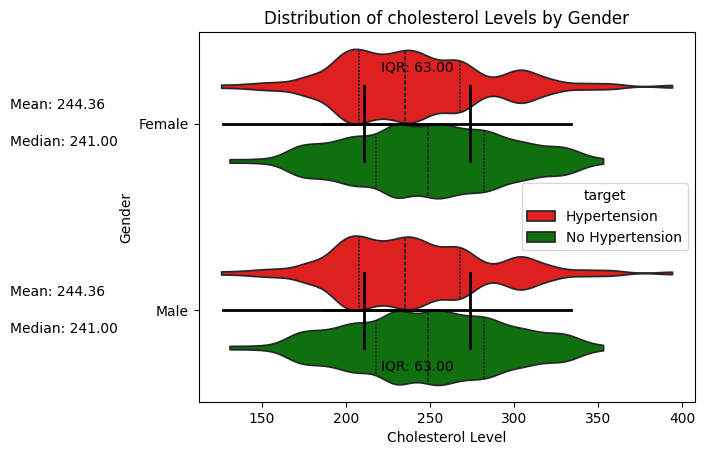

In [29]:
# Create separate subsets for males and females
male_data = df_copy[df_copy['sex'] == 'Male']
female_data = df_copy[df_copy['sex'] == 'Female']

# Plot horizontal violinplot using Seaborn
sns.violinplot(x='chol', y='sex', hue='target', data=df_copy, palette=custom_colors, inner='quartile', scale='width', cut=0)

# Add mean and median lines
for i, group in enumerate([male_data, female_data]):
    median = group['chol'].median()
    mean = group['chol'].mean()
    plt.axhline(y=i, xmin=0.05, xmax=0.48, color='black', linewidth=2)
    plt.text(0.51, i+0.1, f'Median: {median:.2f}', ha='left', va='center')
    plt.text(0.51, i-0.1, f'Mean: {mean:.2f}', ha='left', va='center')

# Add IQR whiskers
q1_male, q3_male = male_data['chol'].quantile([0.25, 0.75])
q1_female, q3_female = female_data['chol'].quantile([0.25, 0.75])
plt.axhline(y=0, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.axhline(y=1, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.plot([q1_male, q1_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q3_male, q3_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q1_female, q1_female], [0.8, 1.2], color='black', linewidth=2)
plt.plot([q3_female, q3_female], [0.8, 1.2], color='black', linewidth=2)
plt.text((q1_male+q3_male)/2, -0.3, f'IQR: {q3_male-q1_male:.2f}', ha='center', va='center')
plt.text((q1_female+q3_female)/2, 1.3, f'IQR: {q3_female-q1_female:.2f}', ha='center', va='center')



# Add title and labels
plt.title('Distribution of cholesterol Levels by Gender')
plt.xlabel('Cholesterol Level')
plt.ylabel('Gender')


# Show the plot
# plt.show()
plt.savefig


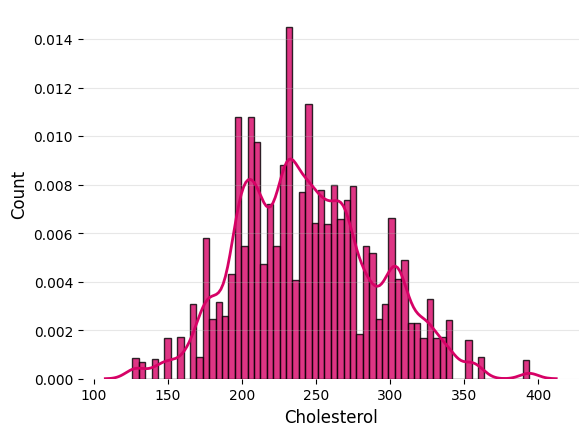

<Figure size 800x600 with 0 Axes>

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iqr = np.percentile(df['chol'], 75) - np.percentile(df['chol'], 25)

# Bin width using the Freedman-Diaconis rule 
bin_width = 2 * iqr / (len(df)**(1/3))

sns.distplot(df['chol'], hist=True, kde=True, 
             bins=int(round((df['chol'].max() - df['chol'].min()) / bin_width)),
             color='#d60266',
             hist_kws={'edgecolor':'black', 'alpha': 0.8},
             kde_kws={'linewidth': 2})

# Add labels and adjust font sizes
plt.xlabel('Cholesterol', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)

# Adjust plot size
plt.figure(figsize=(8, 6))
# Show plot
# plt.show()
plt.savefig('Cholesterol_distribution.png', dpi=600)

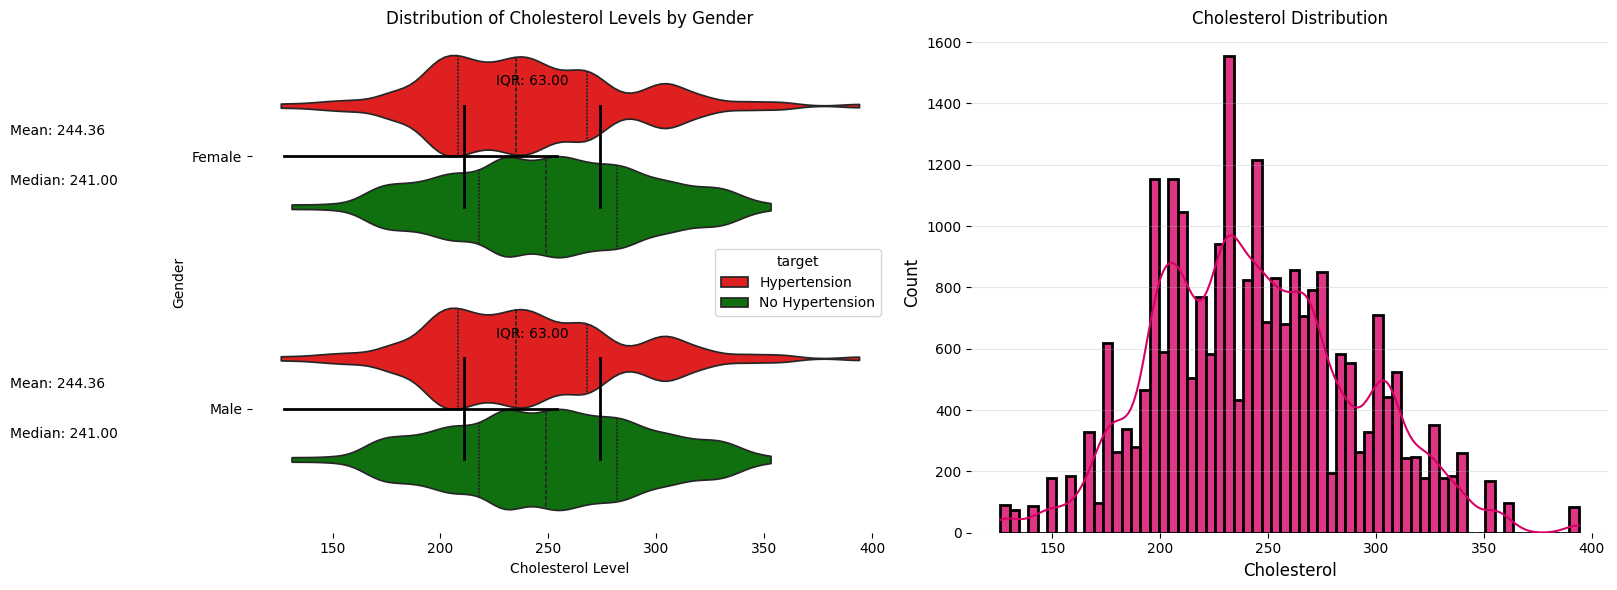

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate subsets for males and females
male_data = df_copy[df_copy['sex'] == 'Male']
female_data = df_copy[df_copy['sex'] == 'Female']

# Calculate IQR and bin width for the histogram
iqr = np.percentile(df['chol'], 75) - np.percentile(df['chol'], 25)
bin_width = 2 * iqr / (len(df)**(1/3))

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Violin plot
sns.violinplot(x='chol', y='sex', hue='target', data=df_copy, palette=custom_colors, inner='quartile', scale='width', cut=0, ax=axes[0])

# Add mean, median, and IQR whiskers to the violin plot
for i, group in enumerate([male_data, female_data]):
    median = group['chol'].median()
    mean = group['chol'].mean()
    axes[0].axhline(y=i, xmin=0.05, xmax=0.48, color='black', linewidth=2)
    axes[0].text(0.51, i+0.1, f'Median: {median:.2f}', ha='left', va='center')
    axes[0].text(0.51, i-0.1, f'Mean: {mean:.2f}', ha='left', va='center')

    q1, q3 = group['chol'].quantile([0.25, 0.75])
    axes[0].plot([q1, q1], [i-0.2, i+0.2], color='black', linewidth=2)
    axes[0].plot([q3, q3], [i-0.2, i+0.2], color='black', linewidth=2)
    axes[0].text((q1+q3)/2, i-0.3, f'IQR: {q3-q1:.2f}', ha='center', va='center')

axes[0].set_title('Distribution of Cholesterol Levels by Gender')
axes[0].set_xlabel('Cholesterol Level')
axes[0].set_ylabel('Gender')

# Histogram with KDE
sns.histplot(df['chol'], kde=True, bins=int(round((df['chol'].max() - df['chol'].min()) / bin_width)),
             color='#d60266', edgecolor='black', alpha=0.8, linewidth=2, ax=axes[1])

axes[1].set_xlabel('Cholesterol', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
sns.despine(left=True, bottom=True)
axes[1].grid(axis='y', alpha=0.3)
axes[1].xaxis.grid(False)
axes[1].set_title('Cholesterol Distribution')

# Adjust layout and save
plt.tight_layout()
plt.savefig('Cholesterol_Combined_Plots.png', dpi=600)
plt.show()


In [32]:
# Calculate skewness using the skew() function
skewness = stats.skew(df['chol'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df['chol'], fisher=False)

# Print the result
print("Skewness:", skewness)
# Print the result
print("Kurtosis:", kurtosis)

Skewness: 0.2542608747224074
Kurtosis: 2.8307869108606427


In [33]:
# Create a dictionary with the values
chol_data = {'Metric': ['Highest Cholesterol Level', 'Average Cholesterol Level', 'Lowest Cholesterol Level'],
             'Value': [df['chol'].max(), df['chol'].mean(), df['chol'].min()]}

# Create a pandas DataFrame from the dictionary
chol_table = pd.DataFrame(chol_data)

# Create the table using Seaborn styling
styled_table = (chol_table.style
                .set_caption('Cholesterol Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                .format({'Value': '{:.2f}'}))

# Display the table
display(styled_table)

In [34]:
df[['sex', 'chol', 'target', 'cp', 'trestbps', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']].corr()['target'].sort_values(ascending=False).head(10)

target      1.000000e+00
thalach     4.290770e-01
cp          4.103299e-01
slope       3.296047e-01
sex         1.774490e-16
chol       -9.739153e-02
trestbps   -1.201314e-01
thal       -3.698188e-01
oldpeak    -4.339789e-01
ca         -4.604172e-01
Name: target, dtype: float64

In [35]:
df_stat = df.copy()
df_stat.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  57.0  1.0   3       145   233    1        0      150      0      2.3   
1  64.0  0.0   2       130   250    0        1      187      0      3.5   
2  52.0  1.0   1       130   204    0        0      172      0      1.4   
3  56.0  0.0   1       120   236    0        1      178      0      0.8   
4  66.0  0.0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

In [36]:

# Separate the hemoglobin data by gender
male_hemoglobin = df_stat.loc[df_stat['sex'] == 0, 'chol']
female_hemoglobin = df_stat.loc[df_stat['sex'] == 1, 'chol']

# Compute the t-test statistic and p-value
t_statistic, p_value = ttest_ind(male_hemoglobin, female_hemoglobin)

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender has an impact on hemoglobin levels.")
else:
    print("Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.")


T-Statistic: 0.00
P-Value: 1.000
Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.


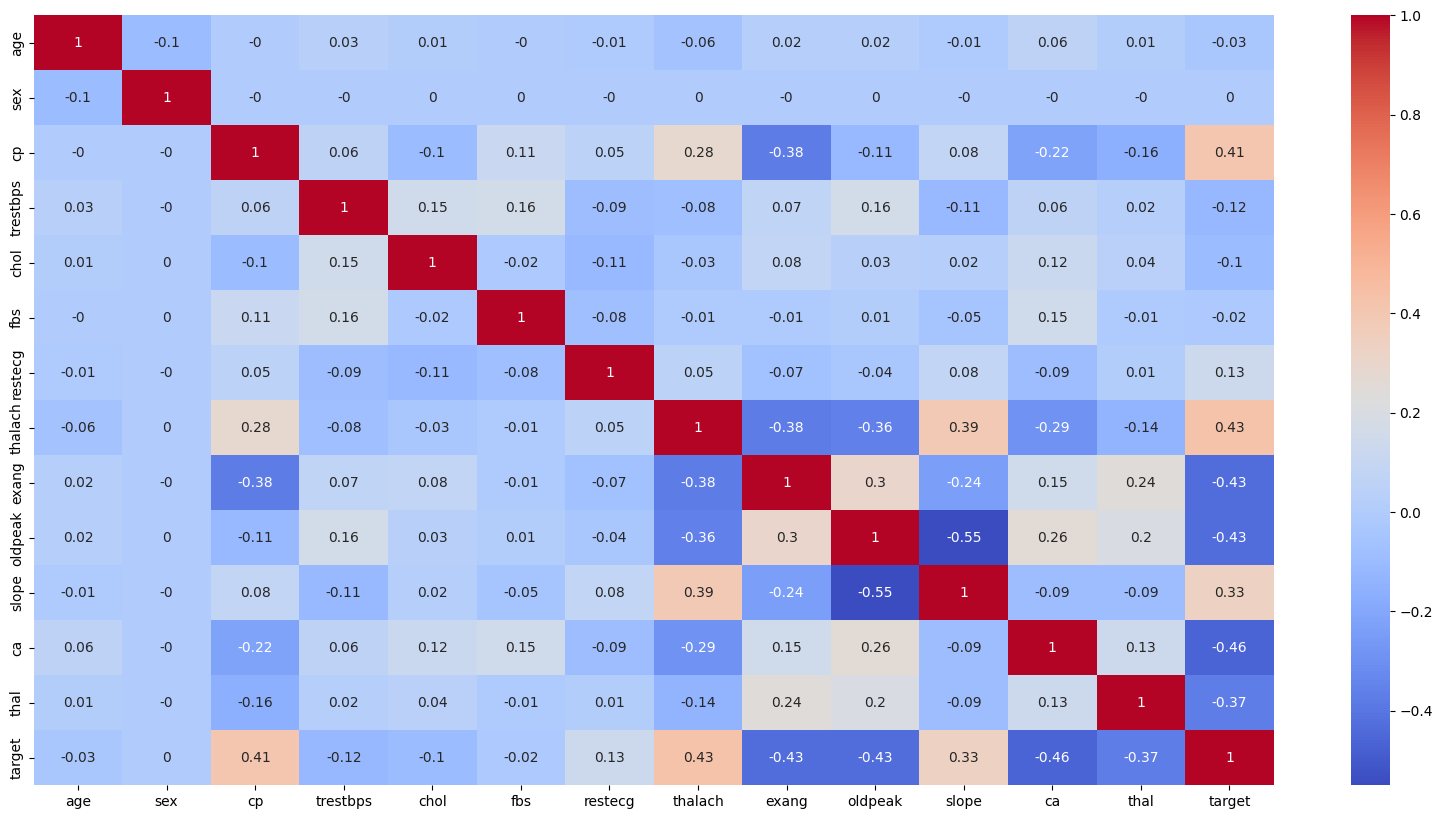

In [37]:
# create a correlation matrix
corr_matrix = df.corr().round(2)

# set the figure size
plt.figure(figsize=(20, 10))

# plot the correlation matrix using a heatmap from seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
#plt.title('Correlation Matrix', fontweight='bold')
# plt.show()
plt.savefig('Correlation_Matrix.png', dpi=600)

In [38]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

# Assuming df is already defined
# Fill NaN values with the mean of the column
df = df.fillna(df.mean())

X = df.iloc[:,0:5]  # independent columns
y = df.iloc[:,5] 

k_values = [2, 3, 4, 5]  # different values of K to try
best_k = 0  # variable to keep track of best K value
best_score = 0  # variable to keep track of best score

for k in k_values:
    # apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(X, y)

    dfscores = pd.DataFrame(fit.scores_) # score for each feature
    dfcolumns = pd.DataFrame(X.columns)

    # concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs','Score']  # naming the dataframe columns

    # get the best K value based on score
    if featureScores['Score'].sum() > best_score:
        best_score = featureScores['Score'].sum()
        best_k = k

print(f"The best value of K is {best_k} with score {best_score}.")

print("---")
print(featureScores)
print("---")
print(featureScores.nlargest(3,'Score'))  #print 3 best features

The best value of K is 2 with score 1859.460745178865.
---
      Specs        Score
0       age     0.560048
1       sex     0.000000
2        cp   327.621405
3  trestbps  1480.516509
4      chol    50.762783
---
      Specs        Score
3  trestbps  1480.516509
2        cp   327.621405
4      chol    50.762783


In [39]:
import shap

from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

In [40]:
# Extremely Randomized Trees.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
# model = ExtraTreesClassifier()
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [41]:
print(model.feature_importances_) 

[0.0316456  0.00168784 0.07738982 0.3396935  0.54958324]


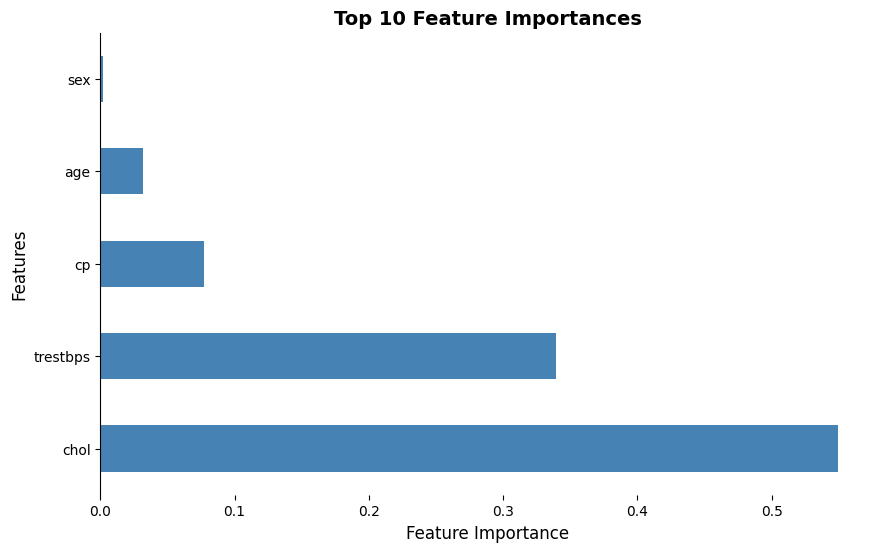

<Figure size 640x480 with 0 Axes>

In [42]:
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# feat_importances.nlargest(3).plot(kind='barh', color='#808080')
# plt.xlabel('Importance')
# # plt.title('Top 3 Features Importance', fontweight='bold', fontsize=12)
# # Remove spines
# sns.despine(left=False, bottom=True)
# plt.show()
# plt.savefig('TopFeatures.png', dpi=600)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind='barh', color='#4682B4')  # Steel blue color for better aesthetics

plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature Importances', fontweight='bold', fontsize=14)

# Remove unnecessary spines for a cleaner look
sns.despine(left=False, bottom=True)

# Show the plot
plt.show()

# Save the figure
plt.savefig('Top10Features.png', dpi=600, bbox_inches='tight')


In [43]:
# Scale Hemoglobin by log
df['Cholestorol_log'] = np.log(df.chol + 0.01)

In [44]:
# Scale Hemoglobin by Standardization
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df['Cholestorol_scaled'] = ss.fit_transform(df['chol'].values.reshape(-1,1))

In [45]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
df['Cholestorol_minmax'] = mm.fit_transform(df['chol'].values.reshape(-1,1))

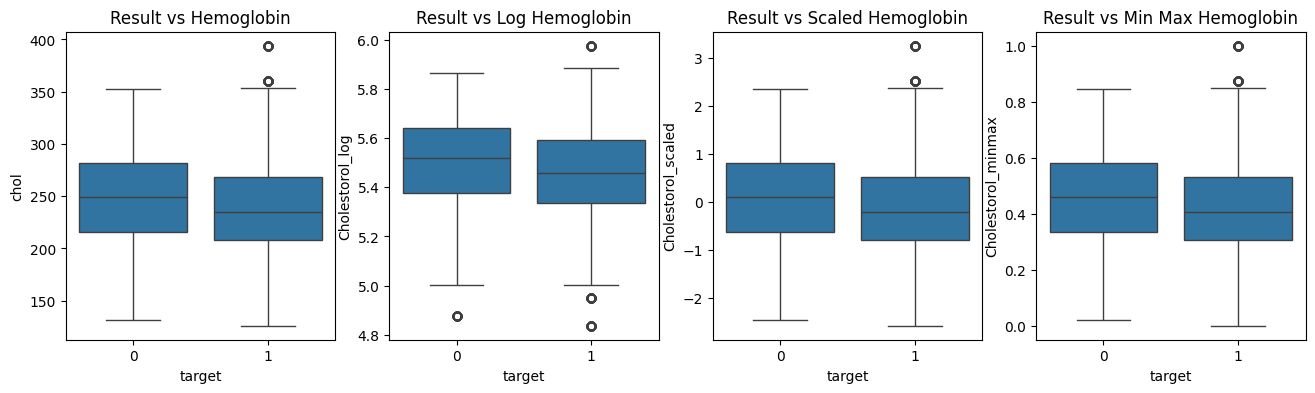

In [46]:
#Feature engineering to a better visualization of the values

# Let's explore the Aby Result and see the distribuition of Hemoglobin
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="target",y="chol",data=df, ax = axs[0])
axs[0].set_title("Result vs Hemoglobin")

sns.boxplot(x ="target",y="Cholestorol_log",data=df, ax = axs[1])
axs[1].set_title("Result vs Log Hemoglobin")

sns.boxplot(x ="target",y="Cholestorol_scaled",data=df, ax = axs[2])
axs[2].set_title("Result vs Scaled Hemoglobin")

sns.boxplot(x ="target",y="Cholestorol_minmax",data=df, ax = axs[3])
axs[3].set_title("Result vs Min Max Hemoglobin")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

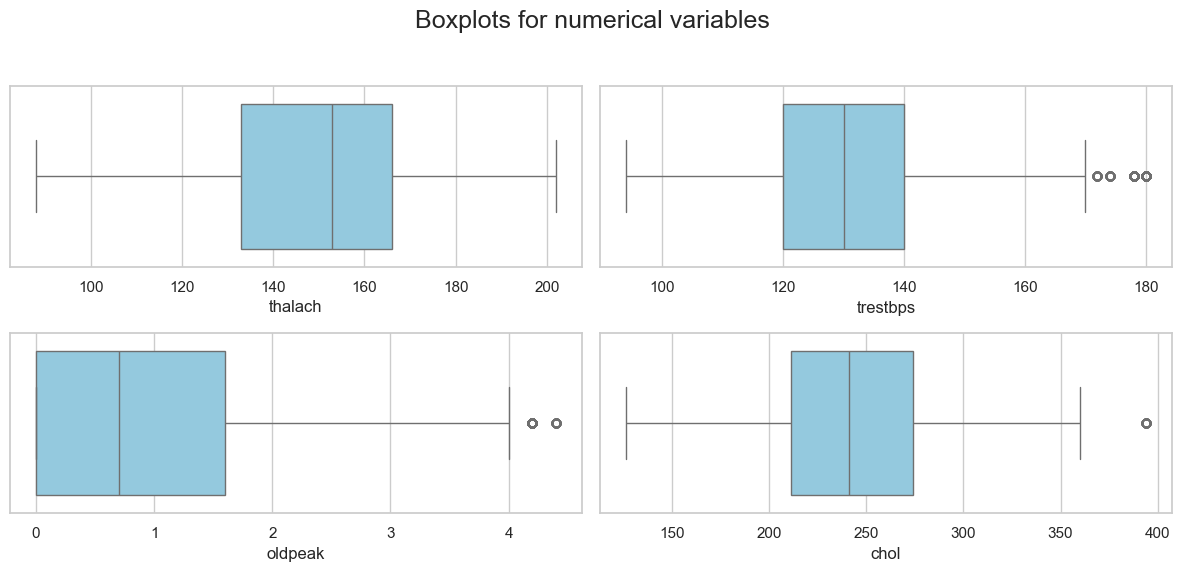

In [47]:
data = df[['thalach', 'trestbps', 'oldpeak', 'chol']]

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6)) 
for i, column in enumerate(data.columns):
    sns.boxplot(x=data[column], ax=axes[i//2, i%2], orient="h", color="skyblue")
    axes[i//2, i%2].set_xlabel(column)

fig.suptitle("Boxplots for numerical variables", fontsize=18) 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

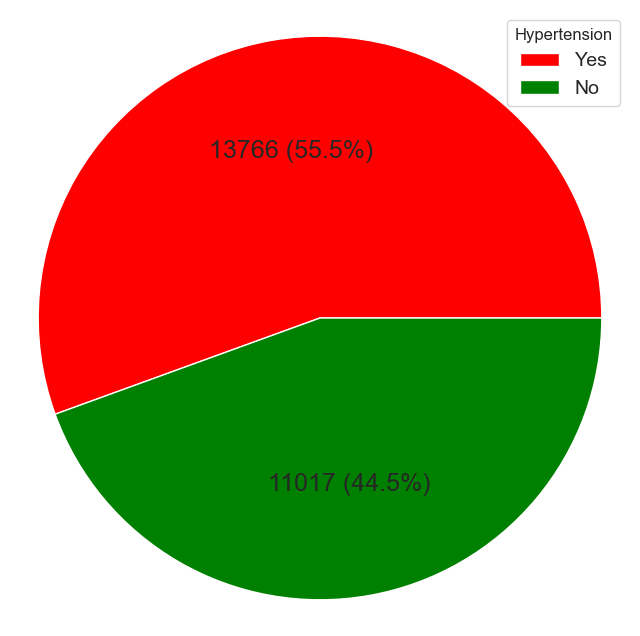

In [48]:
#Target variable - pie chart
freq_table = pd.DataFrame(df['target'].value_counts()).reset_index()
freq_table.columns = ['target', 'Freq']
freq_table['Percentage'] = round(freq_table['Freq'] / freq_table['Freq'].sum() * 100, 1)

plt.figure(figsize=(8, 8))
colors = ['red', 'green']
wedges, _, autotexts = plt.pie(freq_table['Freq'], colors=colors, autopct='', textprops={'fontsize': 12})  # Usuwamy domyślne etykiety
for i, autotext in enumerate(autotexts):
    autotext.set_text(f"{freq_table['Freq'].values[i]} ({freq_table['Percentage'].values[i]}%)")
    autotext.set_fontsize(18)

# plt.title('Outcome variable - level of balance', fontsize=24)
plt.legend(title='Hypertension', labels=['Yes', 'No'], fontsize=14)
plt.axis('equal')
plt.savefig('Hypertension_pie.png', dpi=600)

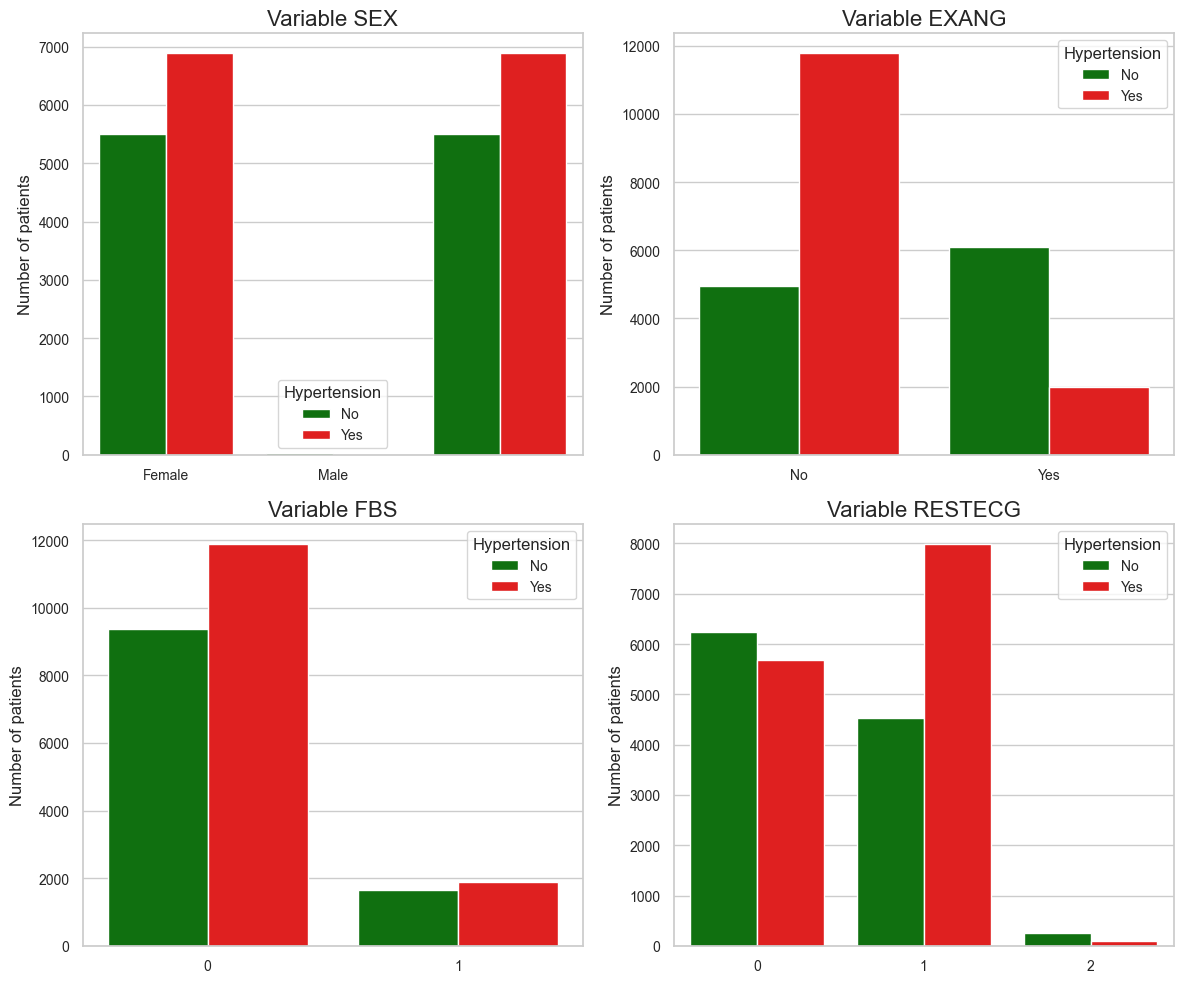

In [49]:
#Column charts (1)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#Variable SEX
sns.countplot(data=df, x='sex', hue='target', palette=['green', 'red'], ax=axes[0, 0])
axes[0, 0].set_title('Variable SEX', fontsize=16)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Number of patients')
axes[0, 0].legend(title='Hypertension', labels=['No', 'Yes'], fontsize=10)
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Female', 'Male'])
axes[0, 0].tick_params(axis='both', labelsize=10)

#Variable EXANG
sns.countplot(data=df, x='exang', hue='target', palette=['green', 'red'], ax=axes[0, 1])
axes[0, 1].set_title('Variable EXANG', fontsize=16)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Number of patients')
axes[0, 1].legend(title='Hypertension', labels=['No', 'Yes'], fontsize=10)
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No', 'Yes'])
axes[0, 1].tick_params(axis='both', labelsize=10)

#Variable FBS
sns.countplot(data=df, x='fbs', hue='target', palette=['green', 'red'], ax=axes[1, 0])
axes[1, 0].set_title('Variable FBS', fontsize=16)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Number of patients')
axes[1, 0].legend(title='Hypertension', labels=['No', 'Yes'], fontsize=10)
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['0', '1'])
axes[1, 0].tick_params(axis='both', labelsize=10)

#Variable RESTECG
sns.countplot(data=df, x='restecg', hue='target', palette=['green', 'red'], ax=axes[1, 1])
axes[1, 1].set_title('Variable RESTECG', fontsize=16)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Number of patients')
axes[1, 1].legend(title='Hypertension', labels=['No', 'Yes'], fontsize=10)
axes[1, 1].tick_params(axis='both', labelsize=10)
axes[1, 1].set_xticks([0, 1, 2])
axes[1, 1].set_xticklabels(['0', '1', '2'])
plt.tight_layout()
# plt.show()
plt.savefig('Hypertension_column1.png', dpi=600)

In [50]:
# calculate Q1, Q3, and IQR of the 'anemia' column
Q1 = df['Cholestorol_log'].quantile(0.25)
Q3 = df['Cholestorol_log'].quantile(0.75)
IQR = Q3 - Q1

# print the values of Q1, Q3, and IQR
print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 5.3519055257179655
Q3: 5.61316460207246
IQR: 0.2612590763544942


In [51]:
# calculate Q1, Q3, and IQR of the 'anemia' column
Q1 = df['Cholestorol_scaled'].quantile(0.25)
Q3 = df['Cholestorol_scaled'].quantile(0.75)
IQR = Q3 - Q1

# print the values of Q1, Q3, and IQR
print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: -0.7236433360763118
Q3: 0.6444946955849105
IQR: 1.3681380316612222


In [52]:
# calculate Q1, Q3, and IQR of the 'anemia' column
Q1 = df['Cholestorol_minmax'].quantile(0.25)
Q3 = df['Cholestorol_minmax'].quantile(0.75)
IQR = Q3 - Q1

# print the values of Q1, Q3, and IQR
print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 0.31716417910447764
Q3: 0.5522388059701493
IQR: 0.23507462686567165


In [53]:
# calculate Q1, Q3, and IQR of the 'anemia' column
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

# print the values of Q1, Q3, and IQR
print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 211.0
Q3: 274.0
IQR: 63.0


In [54]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Cholestorol_log',
       'Cholestorol_scaled', 'Cholestorol_minmax'],
      dtype='object')

In [55]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the selected feature only 
X = df.drop(['target'],axis=1)
y = df['target']

In [56]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [57]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (17348, 16)
y_train -  (17348,)
X_test -  (7435, 16)
y_test -  (7435,)


In [58]:
from sklearn import datasets, ensemble, model_selection

# Define X_train and y_train variables

regressor = ensemble.RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
import shap

# Create an explainer for the RandomForestRegressor
explainer = shap.TreeExplainer(regressor)

# Calculate SHAP values for the training dataset
shap_values = explainer.shap_values(X_train)

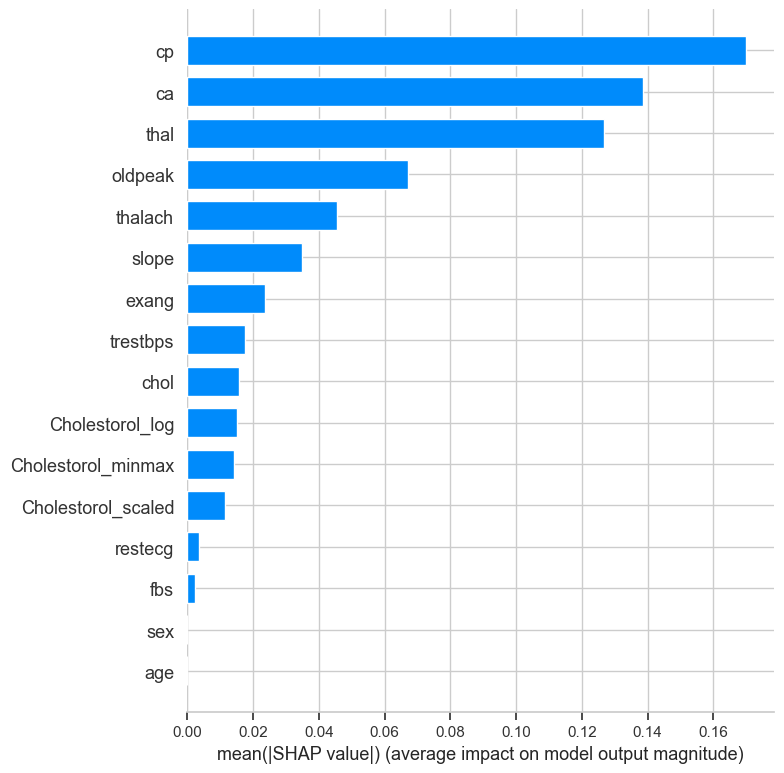

<Figure size 640x480 with 0 Axes>

In [60]:
import shap
import matplotlib.pyplot as plt

# Assuming 'shap_values' and 'X_train' are already calculated
features = X_train.columns.tolist()

shap.summary_plot(shap_values, X_train, feature_names=features, plot_type="bar")
plt.savefig('Hypertension_FeatureImportance.png', dpi=600)

In [61]:
import shap
import matplotlib.pyplot as plt

# Assuming 'shap_values' and 'X_train' are already calculated

# Create SHAP summary plot
plt.figure()  # Create a new figure to avoid overlapping issues
shap.summary_plot(shap_values, X_train, feature_names=features, show=False)  # Disable immediate display

# Save the figure at 600 dpi
plt.savefig("shap_summary_plot.png", dpi=600, bbox_inches='tight')

# Close the plot to free up memory
plt.close()

print("SHAP summary plot saved successfully as 'shap_summary_plot.png'.")


SHAP summary plot saved successfully as 'shap_summary_plot.png'.


In [62]:
import shap
import matplotlib.pyplot as plt

# Assuming 'explainer' and 'shap_values' are available

# Create SHAP decision plot
plt.figure()  # Ensure a new figure is created
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names=features, show=False)  # Prevent immediate display

# Save the figure at 600 dpi
plt.savefig("shap_decision_plot.png", dpi=600, bbox_inches='tight')

# Close the plot to free up memory
plt.close()

print("SHAP decision plot saved successfully as 'shap_decision_plot.png'.")


SHAP decision plot saved successfully as 'shap_decision_plot.png'.


# Baseline models

In [63]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [64]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [65]:
# Predict from Test set

y_pred = logreg.predict(X_test)

In [66]:
# Model Evolution
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      3371
           1       0.84      0.93      0.88      4064

    accuracy                           0.87      7435
   macro avg       0.87      0.86      0.86      7435
weighted avg       0.87      0.87      0.86      7435



In [67]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.86510
AUC : 0.85809
Precision : 0.83823
Recall : 0.93332
F1 : 0.88322




In [68]:
# Predicted values counts for Anemic and Non Anemic of test dataset
pd.Series(y_pred).value_counts()

1    4525
0    2910
Name: count, dtype: int64

In [69]:
# Actual values counts for Anemic and Non Anemic  of test dataset
pd.Series(y_test).value_counts()

target
1    4064
0    3371
Name: count, dtype: int64

In [70]:
# confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[2639,  732],
       [ 271, 3793]], dtype=int64)

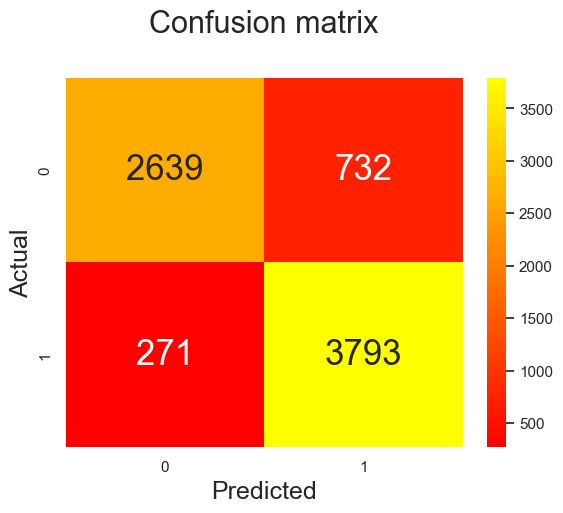

In [71]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [72]:
metrics.roc_auc_score(y_test , y_pred) 

0.8580853408647636

In [73]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.22862221, 0.77137779],
       [0.86978116, 0.13021884],
       [0.23635561, 0.76364439],
       ...,
       [0.14715298, 0.85284702],
       [0.05284884, 0.94715116],
       [0.01055279, 0.98944721]])

AUC -  0.8580853408647636 



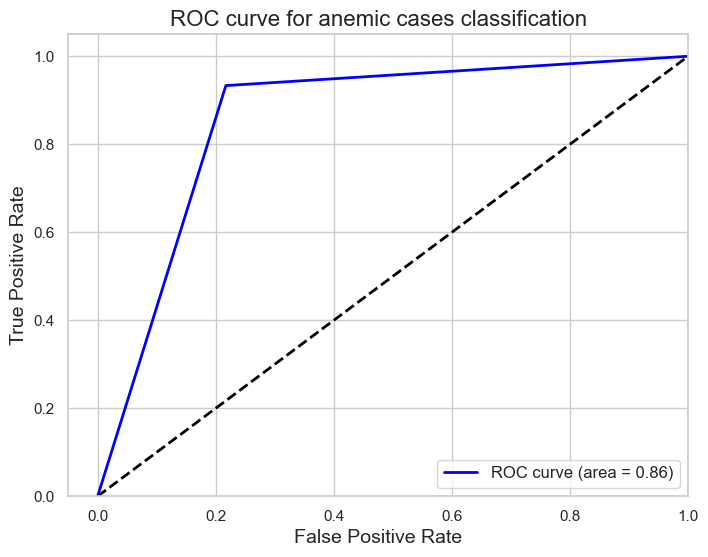

In [74]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve for anemic cases classification', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()


f1=0.883


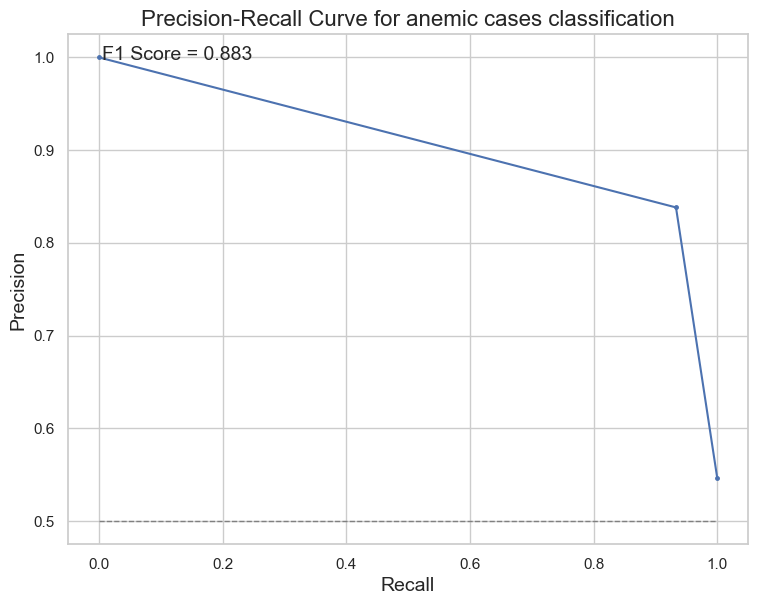

In [75]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

# create figure and axis objects with custom size and padding
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)

# plot no skill
ax.plot([0, 1], [0.5, 0.5], linestyle='--', color='gray', lw=1)

# plot the precision-recall curve
ax.plot(recall, precision, marker='.', markersize=5)

# set axis labels and title
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision-Recall Curve for anemic cases classification', fontsize=16)

# show F1 score in the plot
ax.text(0.05, 0.95, f'F1 Score = {f1:.3f}', transform=ax.transAxes, fontsize=14)

# show the plot
plt.show()


In [76]:
# Import imbalace technique algorithims

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler


In [77]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification



In [78]:
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({1: 9702, 0: 7646})
Resampled dataset shape Counter({0: 7646, 1: 7646})


In [79]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [80]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_rus)))

Accuracy :0.85447
AUC : 0.85021
Precision : 0.84674
Recall : 0.89592
F1 : 0.87064
Kappa Statistic : 0.70463


AUC -  0.8502122010455087 



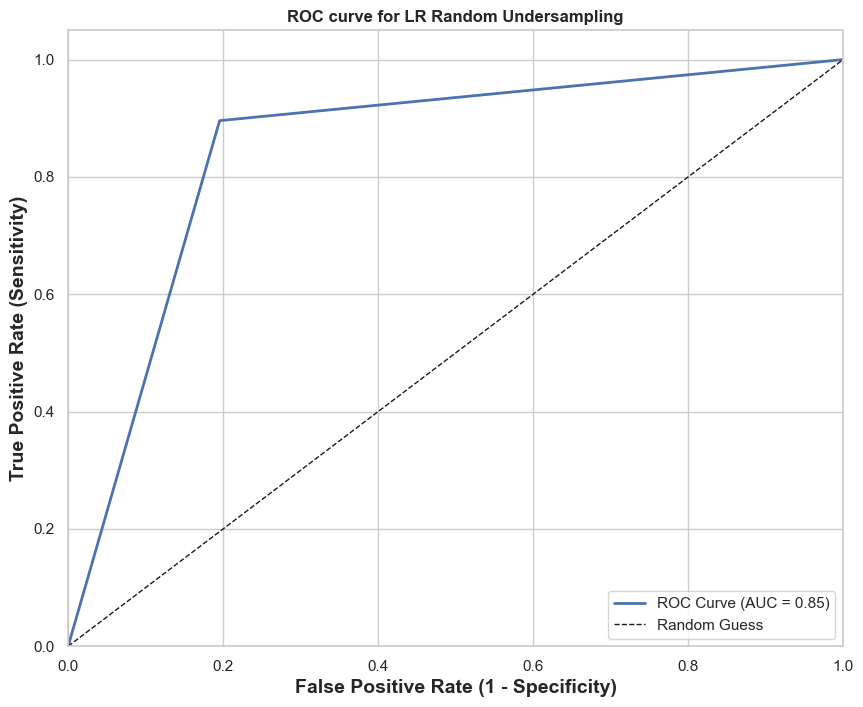

In [81]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.871


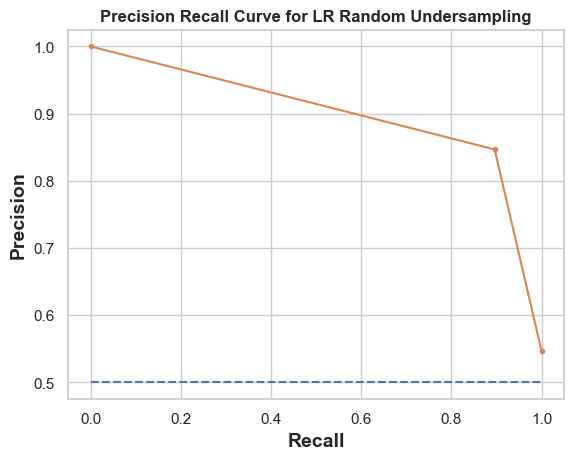

In [82]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# show the plot
plt.show()

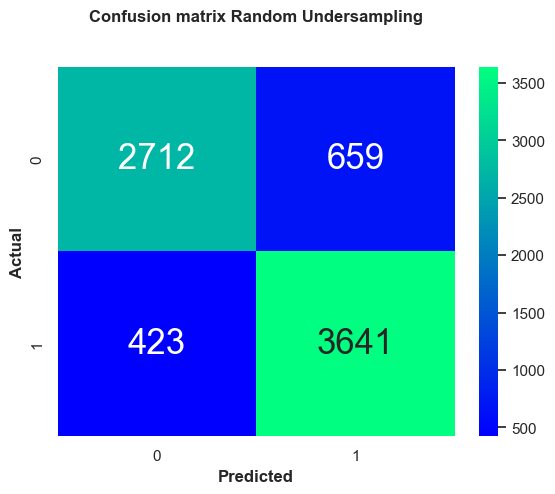

In [83]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix Random Undersampling', y=1.1, fontsize = 12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12, fontweight='bold')
plt.ylabel('Actual',fontsize = 12, fontweight='bold')

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

In [84]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({1: 9702, 0: 7646})
Resampled dataset shape Counter({1: 9702, 0: 9702})


In [85]:
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [86]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_ros)))


Accuracy :0.85340
AUC : 0.84903
Precision : 0.84517
Recall : 0.89592
F1 : 0.86980
Kappa Statistic : 0.70239


AUC -  0.849025609529638 



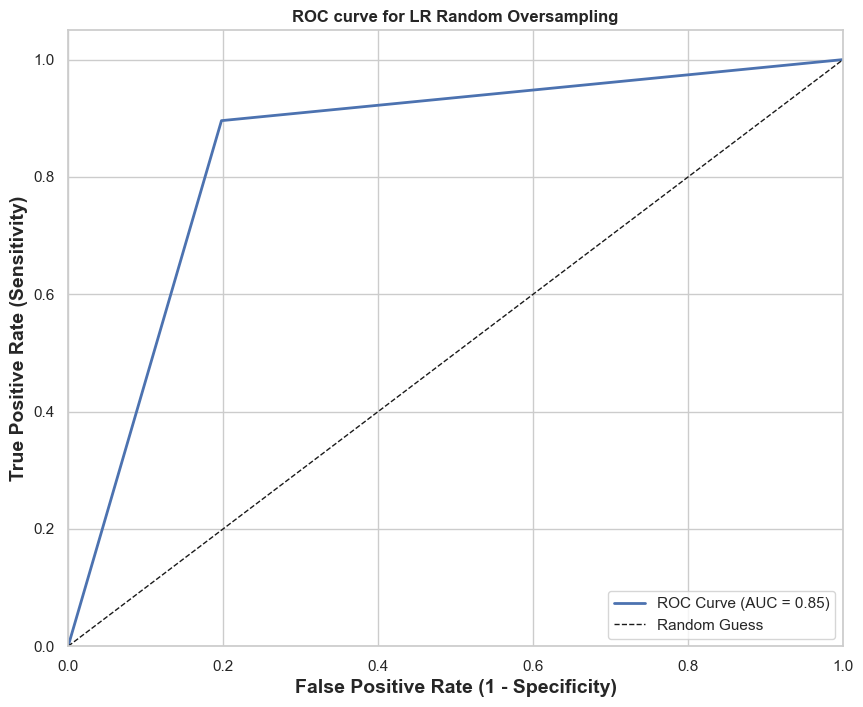

In [87]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Oversampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.870


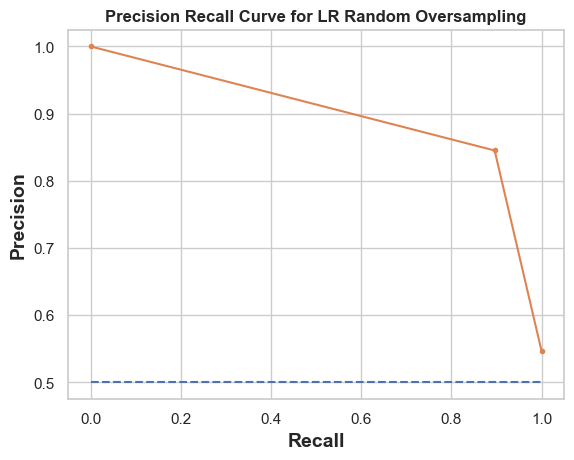

In [88]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')


# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Oversampling', fontsize=12, fontweight='bold')



# show the plot
plt.show()

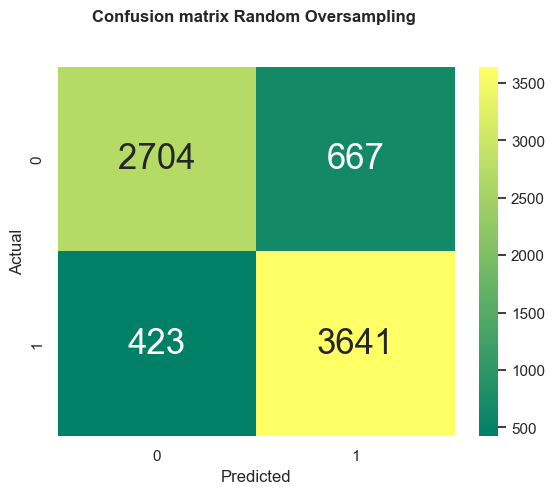

In [89]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="summer" ,fmt='g')

plt.title('Confusion matrix Random Oversampling ', y=1.1,  fontsize=12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

In [90]:
from imblearn.over_sampling import SMOTE, ADASYN


print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({1: 9702, 0: 7646})
Resampled dataset shape Counter({1: 9702, 0: 9702})


In [91]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [92]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_smote)))

Accuracy :0.85434
AUC : 0.84961
Precision : 0.84367
Recall : 0.90034
F1 : 0.87109
Kappa Statistic : 0.70408


AUC -  0.8496086131244497 



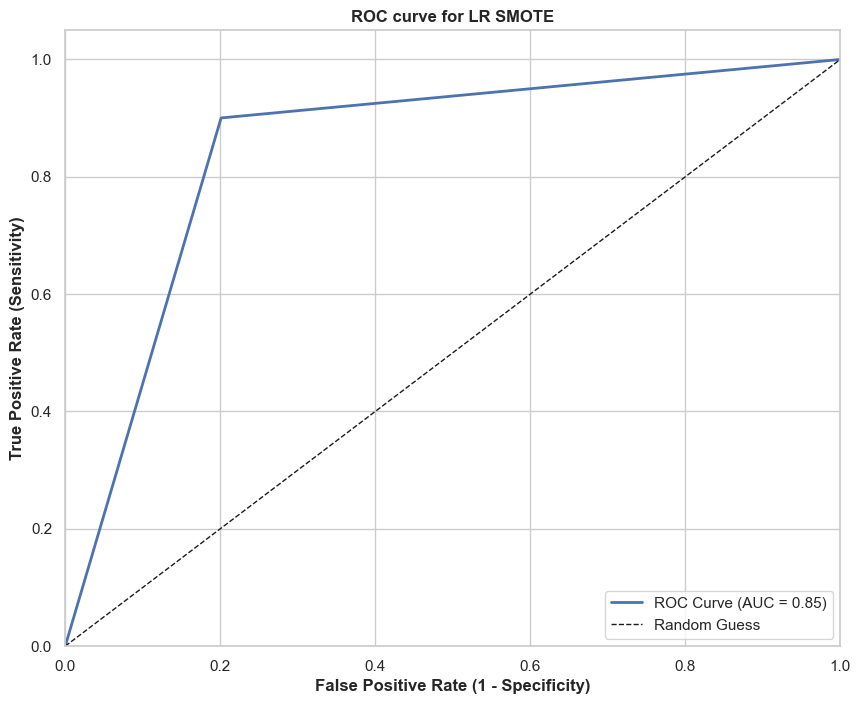

In [93]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)',  fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)',  fontsize=12, fontweight='bold')
plt.title('ROC curve for LR SMOTE',  fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.871


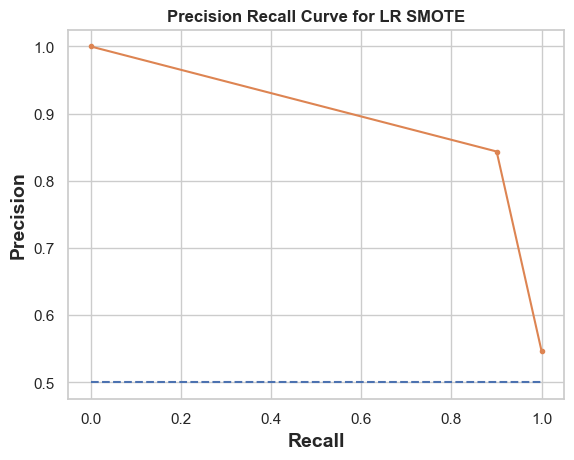

In [94]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR SMOTE', fontsize=12, fontweight='bold')





# show the plot
plt.show()

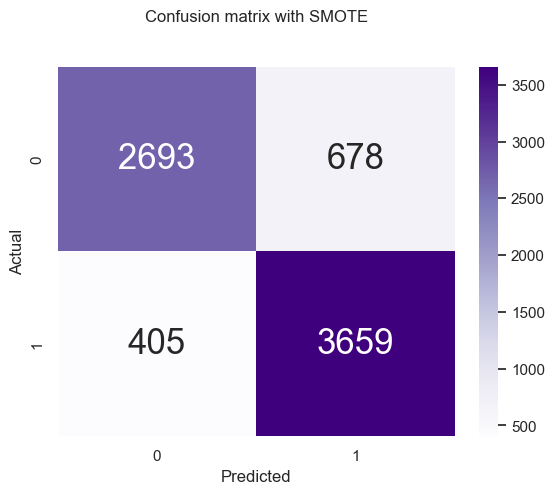

In [95]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Purples" ,fmt='g')

plt.title('Confusion matrix with SMOTE', y=1.1, fontsize = 12)
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)



plt.show()

In [96]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({1: 9702, 0: 7646})
Resampled dataset shape Counter({0: 9723, 1: 9702})


In [97]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [98]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_adasyn)))

Accuracy :0.95548
AUC : 0.85074
Precision : 0.85479
Recall : 0.88214
F1 : 0.86825
Kappa Statistic : 0.70379


AUC -  0.8507386342401727 



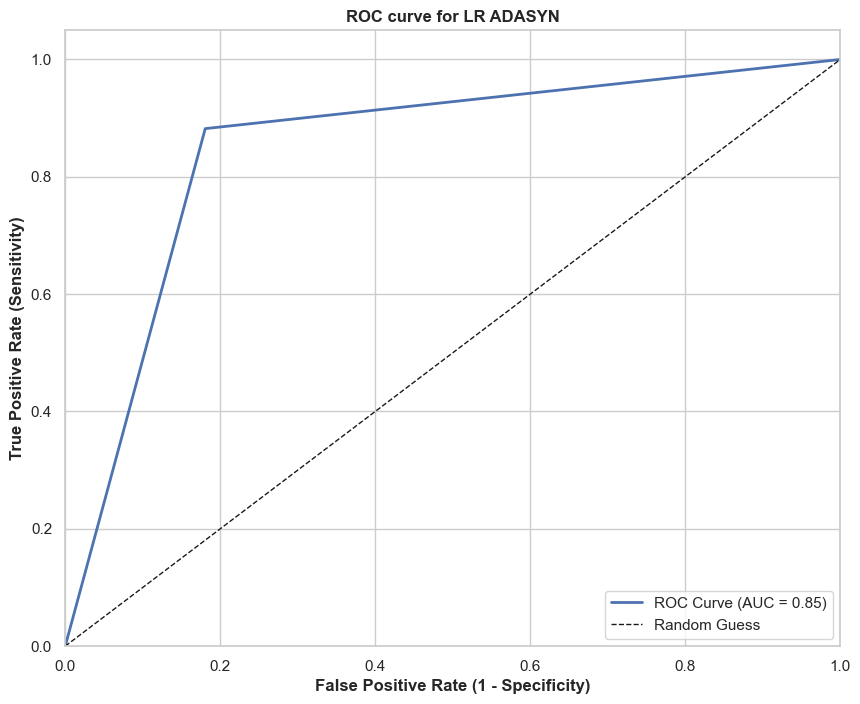

In [99]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12,fontweight='bold')
plt.title('ROC curve for LR ADASYN', fontsize=12,fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()

f1=0.868


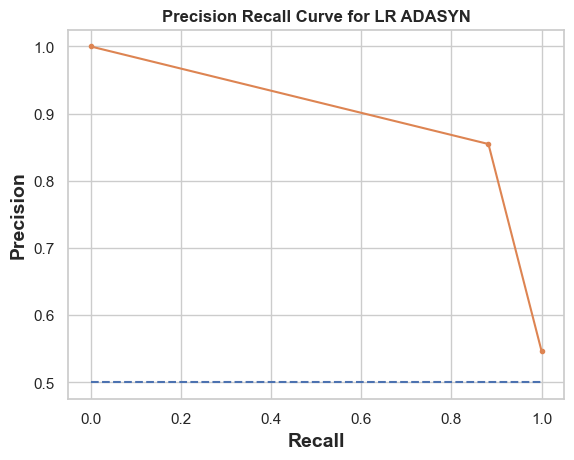

In [100]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_adasyn)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR ADASYN', fontsize=12, fontweight='bold')

# show the plot
plt.show()

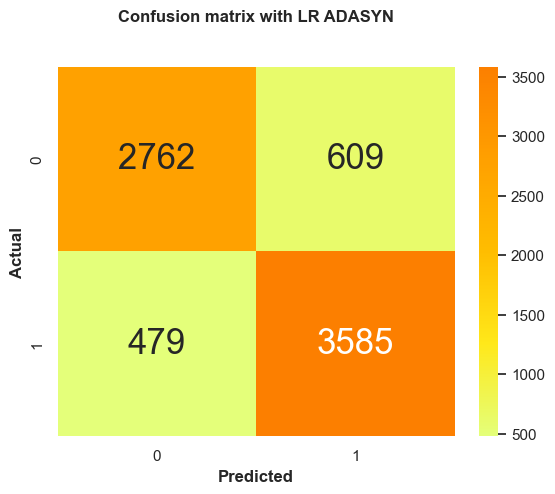

In [101]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Wistia" ,fmt='g')

plt.title('Confusion matrix with LR ADASYN', y=1.1, fontsize = 12,fontweight='bold')
plt.xlabel('Predicted',fontsize = 12,fontweight='bold')
plt.ylabel('Actual',fontsize = 12,fontweight='bold')


plt.show()

In [102]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []
kappa_lst = []
r2_lst= []
mae_lst = []


# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))
        
        
        # calculate kappa Statictis
        kappa = cohen_kappa_score(y_test, y_test_pred)
        kappa_lst.append(kappa)

         #calculate R2 Score
        r2 = metrics.r2_score(y_test, y_test_pred)
        r2_lst.append(r2)

         #calculate MAE Score
        mae = metrics.mean_absolute_error(y_test, y_test_pred)
        mae_lst.append(mae)

        

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)
        
        
        
        

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        
        print('Kappa Statistic : {0:0.5f}'.format(kappa))
        
        print('R2 Score: {0:0.5f}'.format(r2))
        print('Mean absoulte error : {0:0.5f}'.format(mae))

        
        
        print('Confusion Matrix : \n', cnf_matrix)
        
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        # plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
        plt.plot(fpr, tpr, linewidth=2, label=name + f", AUC={auc:.4f}")
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    #plt.title('ROC curve for Predicting a anemia cases')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    # plt.show()
    plt.savefig('ROC_curve.png', dpi=600)

Model Name : DT imbalance
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
R2 Score: 1.00000
Mean absoulte error : 0.00000
Confusion Matrix : 
 [[3371    0]
 [   0 4064]]


Model Name : DT Undersampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
R2 Score: 1.00000
Mean absoulte error : 0.00000
Confusion Matrix : 
 [[3371    0]
 [   0 4064]]


Model Name : DT Oversampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Stat

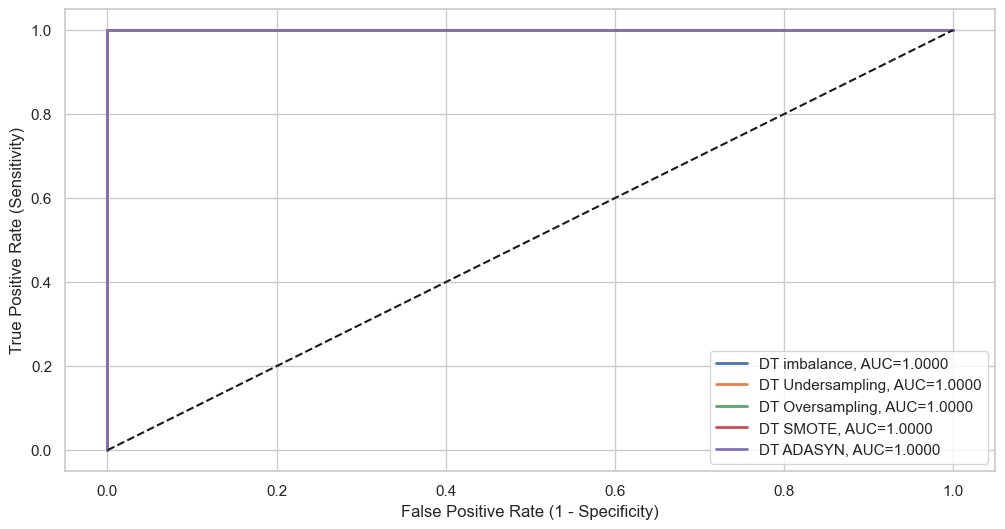

In [103]:
# Decision Tree (DT)
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X_train,y_train,X_test,y_test))
DTmodels.append(('DT Undersampling', dt,X_train_rus,y_train_rus,X_test,y_test))
DTmodels.append(('DT Oversampling', dt,X_train_ros,y_train_ros,X_test,y_test))
DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

Model Name : RF imbalance
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
R2 Score: 1.00000
Mean absoulte error : 0.00000
Confusion Matrix : 
 [[3371    0]
 [   0 4064]]


Model Name : RF Undersampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
R2 Score: 1.00000
Mean absoulte error : 0.00000
Confusion Matrix : 
 [[3371    0]
 [   0 4064]]


Model Name : RF Oversampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Stat

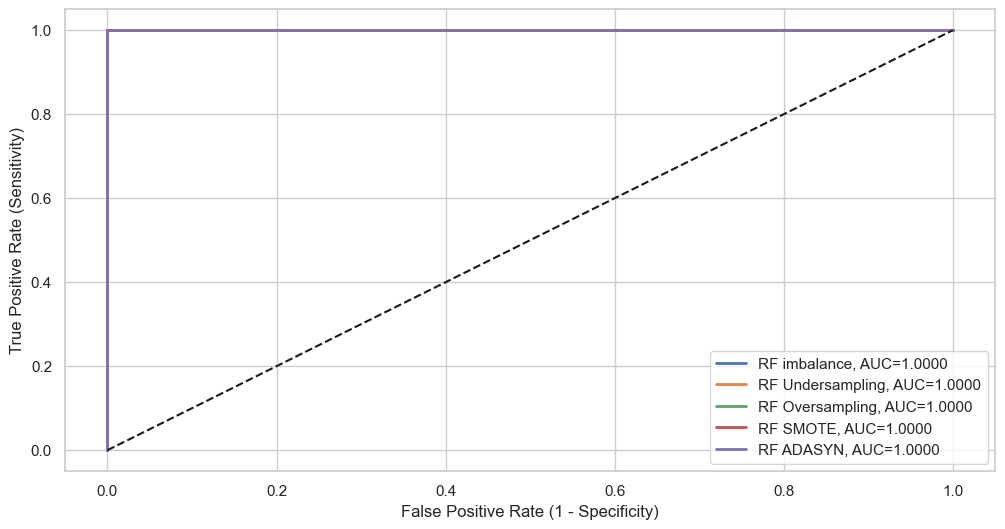

In [104]:
# Random Forest (RF) 
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

Model Name : KNN imbalance
Train Accuracy :0.99890
Test Accuracy :0.99798
Train AUC : 0.99890
Test AUC : 0.99790
Train Precision : 0.99907
Test Precision : 0.99754
Train Recall : 0.99897
Test Recall : 0.99877
Train F1 : 0.99902
Test F1 : 0.99816
Kappa Statistic : 0.99593
R2 Score: 0.99186
Mean absoulte error : 0.00202
Confusion Matrix : 
 [[3361   10]
 [   5 4059]]


Model Name : KNN Undersampling
Train Accuracy :0.99837
Test Accuracy :0.99650
Train AUC : 0.99837
Test AUC : 0.99660
Train Precision : 0.99908
Test Precision : 0.99803
Train Recall : 0.99765
Test Recall : 0.99557
Train F1 : 0.99836
Test F1 : 0.99680
Kappa Statistic : 0.99295
R2 Score: 0.98589
Mean absoulte error : 0.00350
Confusion Matrix : 
 [[3363    8]
 [  18 4046]]


Model Name : KNN Oversampling
Train Accuracy :0.99923
Test Accuracy :0.99812
Train AUC : 0.99923
Test AUC : 0.99813
Train Precision : 0.99959
Test Precision : 0.99852
Train Recall : 0.99887
Test Recall : 0.99803
Train F1 : 0.99923
Test F1 : 0.99828
Kappa S

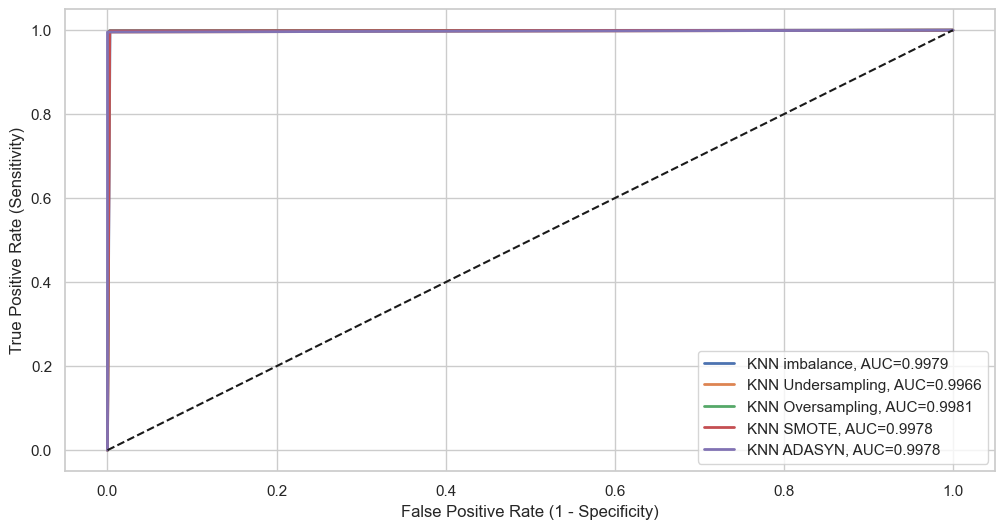

In [105]:
# K-Nearest Neighbors (KNN) 
KNNmodels = []

KNNmodels.append(('KNN imbalance', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_train_rus,y_train_rus,X_test,y_test))
KNNmodels.append(('KNN Oversampling', KNeighborsClassifier(),X_train_ros,y_train_ros,X_test,y_test))
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote,y_train_smote,X_test,y_test))
KNNmodels.append(('KNN ADASYN', KNeighborsClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

Model Name : SVM imbalance
Train Accuracy :1.00000
Test Accuracy :0.99960
Train AUC : 1.00000
Test AUC : 0.99956
Train Precision : 1.00000
Test Precision : 0.99926
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 0.99963
Kappa Statistic : 0.99919
R2 Score: 0.99837
Mean absoulte error : 0.00040
Confusion Matrix : 
 [[3368    3]
 [   0 4064]]


Model Name : SVM Undersampling
Train Accuracy :1.00000
Test Accuracy :0.99973
Train AUC : 1.00000
Test AUC : 0.99970
Train Precision : 1.00000
Test Precision : 0.99951
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 0.99975
Kappa Statistic : 0.99946
R2 Score: 0.99891
Mean absoulte error : 0.00027
Confusion Matrix : 
 [[3369    2]
 [   0 4064]]


Model Name : SVM Oversampling
Train Accuracy :1.00000
Test Accuracy :0.99960
Train AUC : 1.00000
Test AUC : 0.99956
Train Precision : 1.00000
Test Precision : 0.99926
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 0.99963
Kappa S

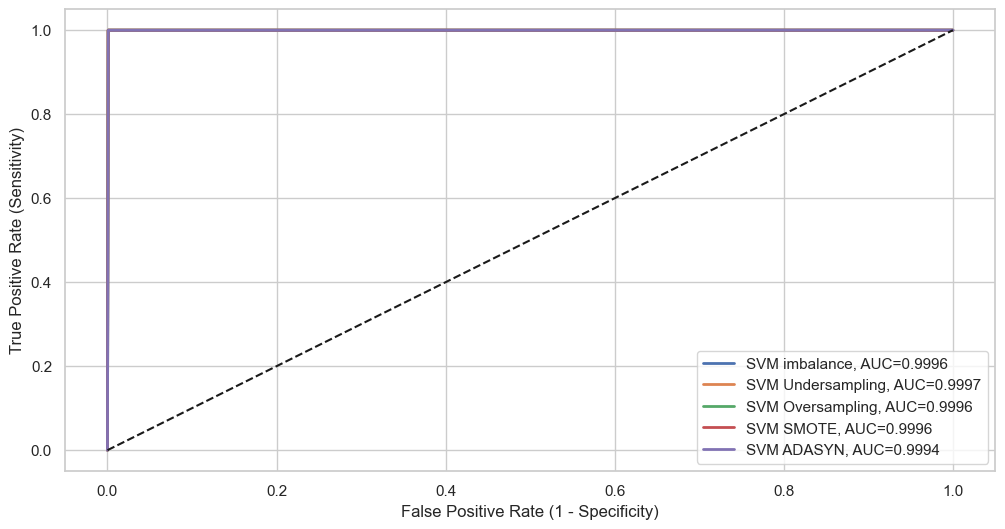

In [106]:
 # Support Vector Machines (SVM)
SVMmodels = []

SVMmodels.append(('SVM imbalance', SVC(gamma='auto'),X_train,y_train,X_test,y_test))
SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_train_rus,y_train_rus,X_test,y_test))
SVMmodels.append(('SVM Oversampling', SVC(gamma='auto'),X_train_ros,y_train_ros,X_test,y_test))
SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_train_smote,y_train_smote,X_test,y_test))
SVMmodels.append(('SVM ADASYN', SVC(gamma='auto'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(SVMmodels)

In [107]:
# # Gaussian Naive Bayes (NB) 
# NBmodels = []

# NBmodels.append(('NB imbalance', GaussianNB(),X_train,y_train,X_test,y_test))
# NBmodels.append(('NB Undersampling', GaussianNB(),X_train_rus,y_train_rus,X_test,y_test))
# NBmodels.append(('NB Oversampling', GaussianNB(),X_train_ros,y_train_ros,X_test,y_test))
# NBmodels.append(('NB SMOTE', GaussianNB(),X_train_smote,y_train_smote,X_test,y_test))
# NBmodels.append(('NB ADASYN', GaussianNB(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# # Call function to create model and measure its performance
# build_measure_model(NBmodels)

In [108]:
data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst,
       'Kappa Stat' : kappa_lst
       }



print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data)
performance_df = performance_df.round(3)
finaltable = performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)
finaltable

Performance measures of various classifiers: 



Model  Accuracy_Test  AUC_Test  PrecisionScore_Test  \
0        DT imbalance          1.000     1.000                1.000   
1    DT Undersampling          1.000     1.000                1.000   
2     DT Oversampling          1.000     1.000                1.000   
3            DT SMOTE          1.000     1.000                1.000   
4           DT ADASYN          1.000     1.000                1.000   
5        RF imbalance          1.000     1.000                1.000   
6    RF Undersampling          1.000     1.000                1.000   
7     RF Oversampling          1.000     1.000                1.000   
8            RF SMOTE          1.000     1.000                1.000   
9           RF ADASYN          1.000     1.000                1.000   
15      SVM imbalance          1.000     1.000                0.999   
16  SVM Undersampling          1.000     1.000                1.000   
17   SVM Oversampling          1.000     1.000                0.999   
18          SVM SMOTE          1.000     1.000                0.999   
19         SVM ADASYN          0.999     0.999                0.999   
10      KNN imbalance          0.998     0.998                0.998   
12   KNN Oversampling          0.998     0.998                0.999   
13          KNN SMOTE          0.998     0.998                0.998   
14         KNN ADASYN          0.998     0.998                1.000   
11  KNN Undersampling          0.997     0.997                0.998   

    RecallScore_Test  F1Score_Test  Kappa Stat  
0              1.000         1.000       1.000  
1              1.000         1.000       1.000  
2              1.000         1.000       1.000  
3              1.000         1.000       1.000  
4              1.000         1.000       1.000  
5              1.000         1.000       1.000  
6              1.000         1.000       1.000  
7              1.000         1.000       1.000  
8              1.000         1.000       1.000  
9              1.000         1.000       1.000  
15             1.000         1.000       0.999  
16             1.000         1.000       0.999  
17             1.000         1.000       0.999  
18             1.000         1.000       0.999  
19             1.000         1.000       0.999  
10             0.999         0.998       0.996  
12             0.998         0.998       0.996  
13             0.998         0.998       0.996  
14             0.996         0.998       0.995  
11             0.996         0.997       0.993

In [109]:
# Export the DataFrame to an Excel file
finaltable.to_excel('my_table_Final.xlsx', index=False)

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define models with best hyperparameters
models = [
    DecisionTreeClassifier(criterion='gini', max_depth=9),
    RandomForestClassifier(max_depth=9, n_estimators=100),
    # SVC(C=0.1, kernel='linear'),
    GaussianNB(),  # No hyperparameters tuned
    LogisticRegression(C=1, solver='liblinear'),
    KNeighborsClassifier(algorithm='auto', n_neighbors=2)
]

# Perform 5-fold cross-validation for each classifier
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__} - Mean Accuracy: {scores.mean():.4f}, Std Deviation: {scores.std():.4f}")


DecisionTreeClassifier - Mean Accuracy: 0.9978, Std Deviation: 0.0012
RandomForestClassifier - Mean Accuracy: 1.0000, Std Deviation: 0.0000
GaussianNB - Mean Accuracy: 0.8343, Std Deviation: 0.0045
LogisticRegression - Mean Accuracy: 0.8630, Std Deviation: 0.0030
KNeighborsClassifier - Mean Accuracy: 0.9958, Std Deviation: 0.0052


Model Name : Random Forest
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
R2 Score: 1.00000
Mean absoulte error : 0.00000
Confusion Matrix : 
 [[3371    0]
 [   0 4064]]


Model Name : Gradient Boosting
Train Accuracy :0.98715
Test Accuracy :0.98521
Train AUC : 0.98542
Test AUC : 0.98368
Train Precision : 0.97753
Test Precision : 0.97365
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.98864
Test F1 : 0.98665
Kappa Statistic : 0.97007
R2 Score: 0.94030
Mean absoulte error : 0.01479
Confusion Matrix : 
 [[3261  110]
 [   0 4064]]


Model Name : AdaBoost
Train Accuracy :0.86517
Test Accuracy :0.86362
Train AUC : 0.86004
Test AUC : 0.85921
Train Precision : 0.86217
Test Precision : 0.85317
Train Recall : 0.90332
Test Recall : 0.90650
Train F1 : 0.88227
Test F1 : 0.87903
Kappa Statistic

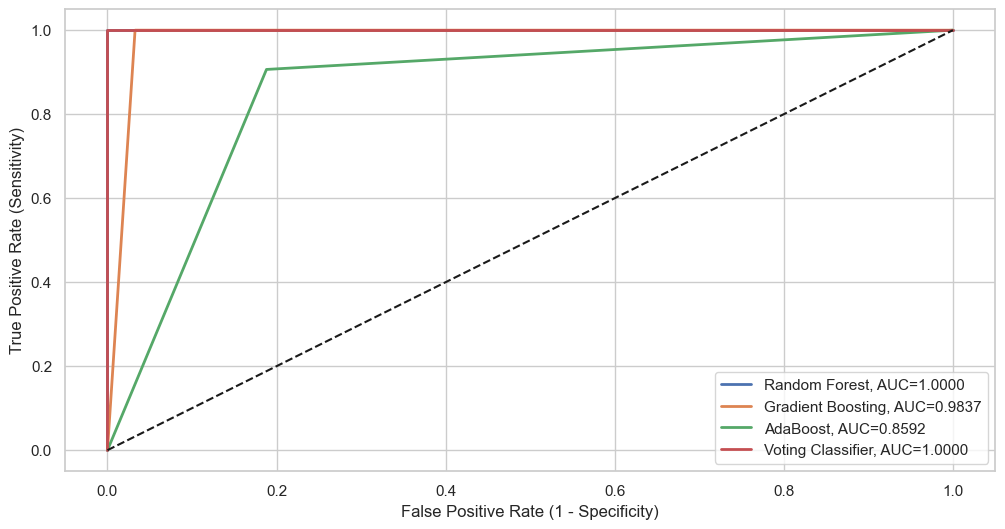

In [111]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

# Ensemble Models
ensemble_models = []

# Append different ensemble models
ensemble_models.append(('Random Forest', RandomForestClassifier(), X_train, y_train, X_test, y_test))
ensemble_models.append(('Gradient Boosting', GradientBoostingClassifier(), X_train, y_train, X_test, y_test))
ensemble_models.append(('AdaBoost', AdaBoostClassifier(), X_train, y_train, X_test, y_test))

# Voting Classifier (combining multiple models)
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier())
], voting='soft')

ensemble_models.append(('Voting Classifier', voting_clf, X_train, y_train, X_test, y_test))

# Call function to create model and measure its performance
build_measure_model(ensemble_models)

In [112]:
dt =  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2', min_samples_split=3, random_state=42)
lg =  LogisticRegression(C= 0.1, solver= 'lbfgs')
svm =  SVC(C=0.1, kernel= 'linear', probability=True)
knn =  KNeighborsClassifier(algorithm= 'auto', n_neighbors= 4)

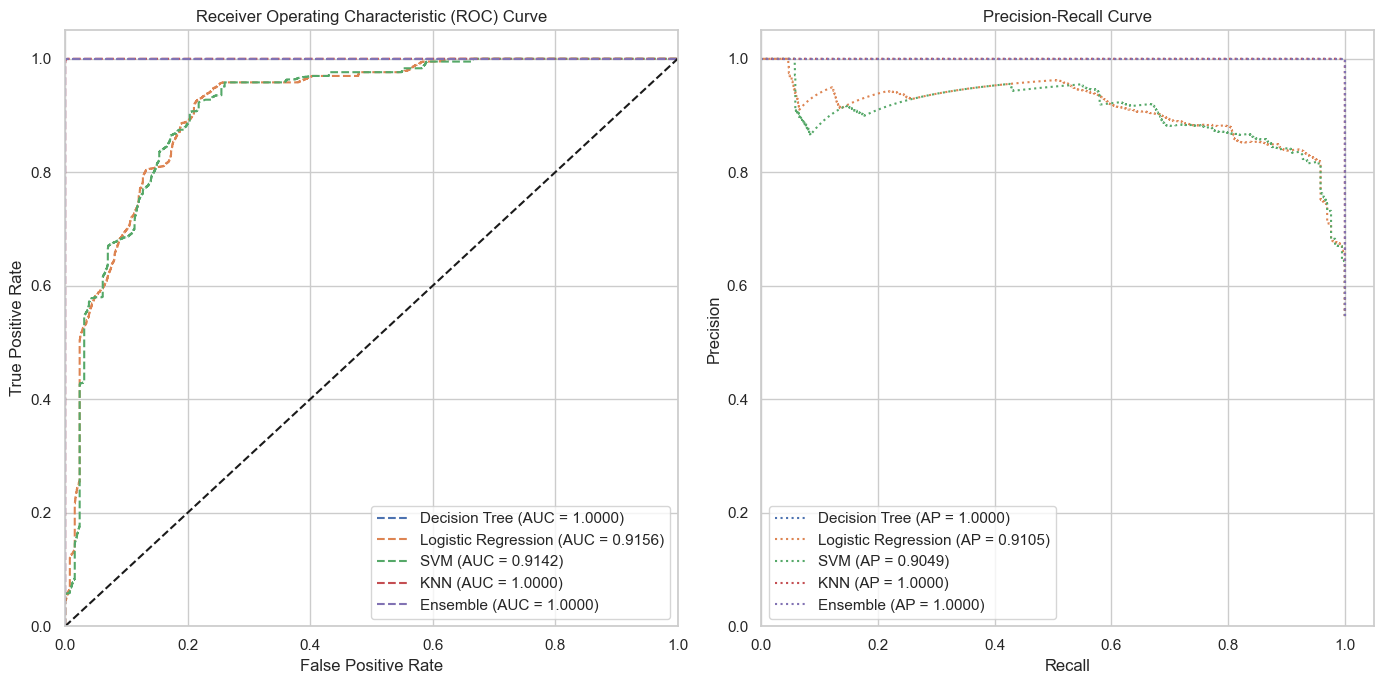

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Store models and corresponding prediction probabilities
models = {
    'Decision Tree': dt,  # Replace with your best RandomForest model
    'Logistic Regression': lg,  # Replace with your best LogisticRegression model
    'SVM': svm,           # Replace with your best SVM model
    'KNN': knn,  # Replace with your best GradientBoosting model
    'Ensemble': voting_clf
}

# Prepare plot
plt.figure(figsize=(14, 7))

# Loop through models and plot ROC and PR curves
for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Get the predicted probabilities for the positive class
    pred_prob = model.predict_proba(X_test)[:, 1]  # Make sure to use your actual test data

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    roc_auc = auc(fpr, tpr)

    # Compute Precision-Recall curve and Average Precision
    precision, recall, _ = precision_recall_curve(y_test, pred_prob)
    avg_precision = average_precision_score(y_test, pred_prob)

    # Plot ROC curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, linestyle='--', label=f'{model_name} (AUC = {roc_auc:.4f})')

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, linestyle='dotted', label=f'{model_name} (AP = {avg_precision:.4f})')

# Set titles and labels
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

# Display the plots
plt.tight_layout()
# plt.show()
plt.savefig('ROC_PR_Curves.png', dpi=600)


In [114]:
models1 = {
    # 'Decision Tree': dt,  # Replace with your best RandomForest model
    'Logistic Regression': lg,  # Replace with your best LogisticRegression model
    'SVM': svm,           # Replace with your best SVM model
    # 'KNN': knn,  # Replace with your best GradientBoosting model
    'Ensemble': voting_clf
}

KS Statistic for Logistic Regression: 0.0244
KS Statistic for SVM: 0.0244
KS Statistic for Ensemble: 0.0244


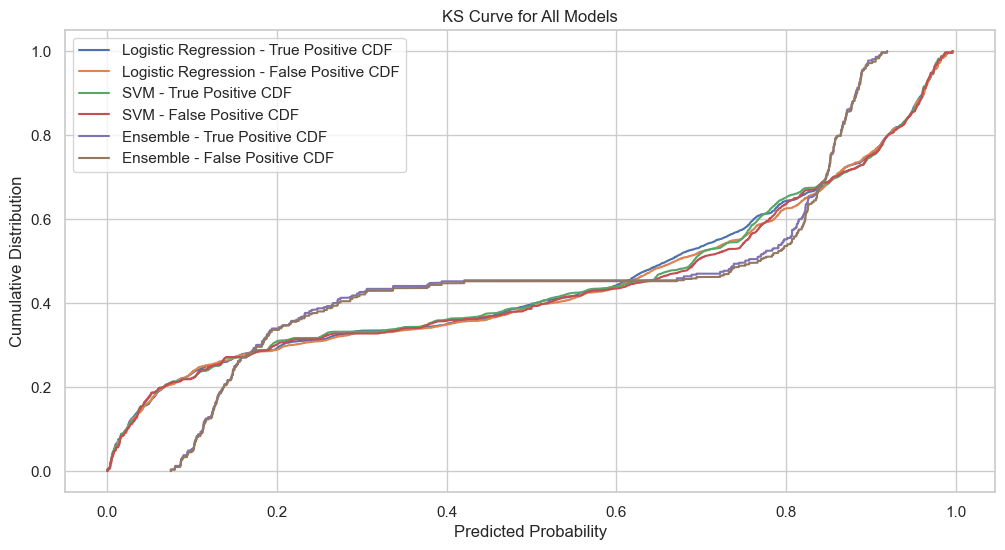

In [115]:
# Prepare the plot
plt.figure(figsize=(12, 6))

# Loop through models and plot KS curves
for model_name, model in models1.items():
    # Get the predicted probabilities for the positive class
    pred_prob = model.predict_proba(X_test)[:, 1]  # Ensure you're using the correct test data

    # Sort the predicted probabilities
    sorted_probs = np.sort(pred_prob)

    # Cumulative distribution for the positive class
    cum_true = np.cumsum(y_test == 1) / np.sum(y_test == 1)

    # Cumulative distribution for the negative class
    cum_false = np.cumsum(y_test == 0) / np.sum(y_test == 0)

    # Calculate KS statistic (maximum difference between the two CDFs)
    ks_stat = np.max(np.abs(cum_true - cum_false))

    # Plot the KS curve
    plt.plot(sorted_probs, cum_true, label=f'{model_name} - True Positive CDF')
    plt.plot(sorted_probs, cum_false, label=f'{model_name} - False Positive CDF')

    # Print the KS statistic for each model
    print(f"KS Statistic for {model_name}: {ks_stat:.4f}")

# Labeling the plot
plt.title("KS Curve for All Models")
plt.xlabel("Predicted Probability")
plt.ylabel("Cumulative Distribution")
plt.legend()
plt.grid(True)

# Show the plot
# plt.show()
plt.savefig('KS_Curve.png', dpi=600)

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  57.0  1.0   3       145   233    1        0      150      0      2.3   
1  64.0  0.0   2       130   250    0        1      187      0      3.5   
2  52.0  1.0   1       130   204    0        0      172      0      1.4   
3  56.0  0.0   1       120   236    0        1      178      0      0.8   
4  66.0  0.0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


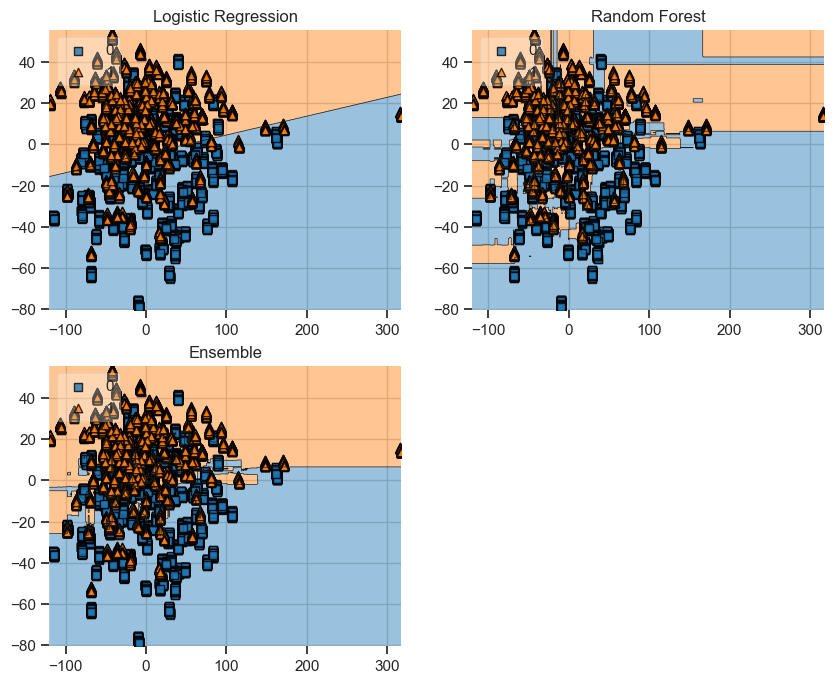

In [116]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import itertools

# # Sklearn modules
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.decomposition import PCA  # Added PCA
# from mlxtend.classifier import EnsembleVoteClassifier
# from mlxtend.plotting import plot_decision_regions

# # Load the dataset properly using pandas
# df = pd.read_csv("F:\Hypertension Plos one\Dataset\Hyper.csv")

# # Display the first few rows for debugging
# print(df.head())

# # Handle potential non-numeric data
# df = df.select_dtypes(include=[np.number])  # Keep only numeric columns
# df = df.dropna()  # Remove missing values if any

# # Extract features (X) and target labels (y)
# X = df.iloc[:, :-1].values  # All columns except the last one as features
# y = df.iloc[:, -1].values   # Last column as target

# # Apply PCA to reduce dimensions to 2D for visualization
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)  # Transformed 2D feature space

# # Initialize classifiers
# clf1 = LogisticRegression(random_state=0)
# clf2 = RandomForestClassifier(random_state=0)
# clf3 = SVC(random_state=0, probability=True)
# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2], weights=[2, 1], voting='soft')

# # Initialize plot
# gs = gridspec.GridSpec(2, 2)
# fig = plt.figure(figsize=(10, 8))

# labels = ['Logistic Regression', 'Random Forest', 'Ensemble']

# # Train and plot decision boundaries
# for clf, lab, grd in zip([clf1, clf2,eclf], labels, itertools.product([0, 1], repeat=2)):
#     clf.fit(X_pca, y)  # Use X_pca instead of X
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X=X_pca, y=y, clf=clf, legend=2)
#     plt.title(lab)

# plt.show()


In [117]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# from sklearn.neighbors import KNeighborsClassifier

# dt =  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2', min_samples_split=3, random_state=42)
# lg =  LogisticRegression(C= 10, solver= 'liblinear')
# svm =  SVC(C=0.1, kernel= 'linear', probability=True)
# knn =  KNeighborsClassifier(algorithm= 'auto', n_neighbors= 4)
# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')
# # mclf= StackingCVClassifier(classifiers=[dt, lg, knn], meta_classifier= svm, random_state=42, cv=5)

# # Define train sizes
# train_sizes = np.linspace(0.1, 1.0, 20)

# # Compute learning curves for the meta-classifier
# train_sizes, train_scores, val_scores = learning_curve(
#     eclf, X, y, train_sizes=train_sizes, cv=5, scoring="accuracy"
# )

# # Compute mean and standard deviation
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# val_mean = np.mean(val_scores, axis=1)
# val_std = np.std(val_scores, axis=1)

# # Plot bias-variance tradeoff
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
# plt.plot(train_sizes, val_mean, label="Validation Score", color="red")

# # Fill between standard deviation
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")
# plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.title("Bias-Variance Curve for Meta-Classifier")
# plt.legend(loc="best")
# plt.show()

In [118]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import itertools
# from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# # Sklearn modules
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.decomposition import PCA  
# from mlxtend.classifier import EnsembleVoteClassifier

# # Load the dataset properly using pandas
# df = pd.read_csv("F:\Hypertension\Dataset\Hyper.csv")

# # Display the first few rows for debugging
# print(df.head())

# # Handle potential non-numeric data
# df = df.select_dtypes(include=[np.number])  # Keep only numeric columns
# df = df.dropna()  # Remove missing values if any

# # Extract features (X) and target labels (y)
# X = df.iloc[:, :-1].values  # All columns except the last one as features
# y = df.iloc[:, -1].values   # Last column as target

# # Apply PCA to reduce dimensions to 3D for visualization
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X)  # Transformed 3D feature space

# # Initialize classifiers
# clf1 = LogisticRegression(random_state=0)
# clf2 = RandomForestClassifier(random_state=0)
# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2], weights=[2, 1], voting='soft')

# labels = ['Logistic Regression', 'Random Forest', 'Ensemble']

# # Create a 3D figure
# fig = plt.figure(figsize=(15, 5))

# # Train and plot decision boundaries
# for idx, (clf, lab) in enumerate(zip([clf1, clf2, eclf], labels)):
#     clf.fit(X_pca, y)  # Use X_pca instead of X
    
#     # Create 3D subplot
#     ax = fig.add_subplot(1, 3, idx+1, projection='3d')
#     ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='coolwarm', edgecolor='k')
    
#     ax.set_title(lab)
#     ax.set_xlabel("PCA1")
#     ax.set_ylabel("PCA2")
#     ax.set_zlabel("PCA3")

# plt.tight_layout()
# plt.show()


In [119]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.decomposition import PCA
# from mlxtend.classifier import EnsembleVoteClassifier

# # Load dataset
# df = pd.read_csv("F:\Hypertension\Dataset\Hyper.csv")
# df = df.select_dtypes(include=[np.number]).dropna()  # Keep numeric and drop NaN
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

# # PCA for 3D visualization
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X)

# # Initialize classifiers
# clf1 = LogisticRegression(random_state=0)
# clf2 = RandomForestClassifier(random_state=0)
# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2], weights=[2, 1], voting='soft')

# labels = ['Logistic Regression', 'Random Forest', 'Ensemble']
# models = [clf1, clf2, eclf]

# # Train classifiers
# for clf in models:
#     clf.fit(X_pca, y)

# # Create meshgrid for decision surface
# x_min, x_max = X_pca[:, 0].min() - 10, X_pca[:, 0].max() + 10
# y_min, y_max = X_pca[:, 1].min() - 10, X_pca[:, 1].max() + 10
# z_min, z_max = X_pca[:, 2].min() - 10, X_pca[:, 2].max() + 10

# xx, yy = np.meshgrid(
#     np.linspace(x_min, x_max, 50),
#     np.linspace(y_min, y_max, 50),
# )

# fig = plt.figure(figsize=(15, 5))

# for idx, (clf, lab) in enumerate(zip(models, labels)):
#     ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    
#     # Predict labels for grid
#     zz = np.zeros(xx.shape)
#     for i in range(xx.shape[0]):
#         for j in range(xx.shape[1]):
#             zz[i, j] = clf.predict([[xx[i, j], yy[i, j], 0]])  # Fix z-axis for decision plane
    
#     # Plot decision surface
#     ax.plot_surface(xx, yy, zz, alpha=0.3, cmap='coolwarm')

#     # Plot data points
#     ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='coolwarm', edgecolor='k')
    
#     ax.set_title(lab)
#     ax.set_xlabel("PCA1")
#     ax.set_ylabel("PCA2")
#     ax.set_zlabel("PCA3")

# plt.tight_layout()
# plt.show()

In [120]:
# import shap

# # Fit the ensemble model on the full dataset
# eclf.fit(X, y)

# # Define a SHAP Kernel Explainer
# explainer = shap.KernelExplainer(eclf.predict_proba, X[:50])  # Use a small sample for efficiency
# shap_values = explainer.shap_values(X, nsamples=100)

# # SHAP Summary Plot
# plt.figure(figsize=(10, 6))
# shap.summary_plot(shap_values[1], X, feature_names=df.columns[:-1])  # Class 1 SHAP values
# plt.show()


# # SHAP Decision Plot
# plt.figure(figsize=(12, 6))
# shap.decision_plot(explainer.expected_value[1], shap_values[1], X, feature_names=df.columns[:-1])
# plt.title("SHAP Decision Plot")
# plt.show()


100%|██████████| 26058/26058 [27:17<00:00, 15.91it/s]


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# from sklearn.ensemble import RandomForestClassifier 

# # Define train sizes
# train_sizes = np.linspace(0.1, 1.0, 10)

# # Compute learning curves
# train_sizes, train_scores, val_scores = learning_curve(
#     eclf, X, y, train_sizes=train_sizes, cv=5, scoring="accuracy"
# )

# # Compute mean and standard deviation
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# val_mean = np.mean(val_scores, axis=1)
# val_std = np.std(val_scores, axis=1)

# # Plot bias-variance tradeoff
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean, "o-", label="Training Score", color="blue")
# plt.plot(train_sizes, val_mean, "o-", label="Validation Score", color="red")

# # Fill between standard deviation
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
# plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="red")

# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.title("Bias-Variance Curve")
# plt.legend(loc="best")
# plt.show()


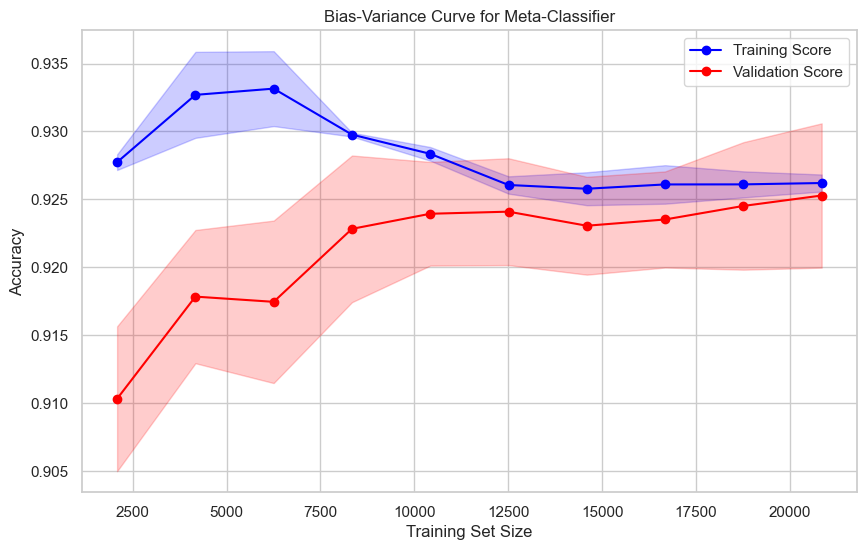

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve

# # Define train sizes
# train_sizes = np.linspace(0.1, 1.0, 10)

# # Compute learning curves for the meta-classifier
# train_sizes, train_scores, val_scores = learning_curve(
#     eclf, X, y, train_sizes=train_sizes, cv=5, scoring="accuracy"
# )

# # Compute mean and standard deviation
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# val_mean = np.mean(val_scores, axis=1)
# val_std = np.std(val_scores, axis=1)

# # Plot bias-variance tradeoff
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean, "o-", label="Training Score", color="blue")
# plt.plot(train_sizes, val_mean, "o-", label="Validation Score", color="red")

# # Fill between standard deviation
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
# plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="red")

# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.title("Bias-Variance Curve for Meta-Classifier")
# plt.legend(loc="best")
# plt.show()


In [122]:
!pip install pytorch-tabnet


TabNet Accuracy: 0.8820


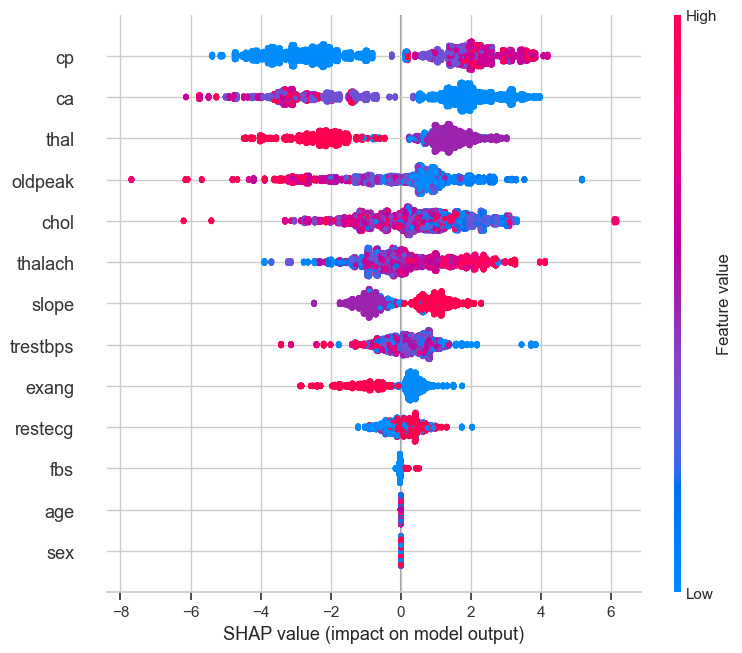

In [123]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("F:\Hypertension Plos one\Dataset\Hyper.csv")

# Ensure only numeric columns are used
df = df.select_dtypes(include=[np.number]).dropna()

# Extract features and labels
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Labels

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model for feature selection
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)

# Determine feature importance threshold
threshold = np.mean(xgb.feature_importances_)  # Use mean importance as a threshold

# Select important features
important_features = xgb.feature_importances_ > threshold
X_train_selected = X_train[:, important_features]
X_test_selected = X_test[:, important_features]

# Train TabNet on selected features
tabnet = TabNetClassifier(verbose=0)
tabnet.fit(X_train_selected, y_train, max_epochs=50, patience=10)

# Predict on test set
y_pred = tabnet.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"TabNet Accuracy: {accuracy:.4f}")

# SHAP explanation
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])
plt.show()


In [124]:
# import xgboost as xgb
# import lightgbm as lgb
# import catboost as cb
# from pytorch_tabnet.tab_model import TabNetClassifier
# import shap

In [125]:
# # Standardizing the dataset
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [126]:
# # XGBoost Classifier
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_test)
# print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

XGBoost Accuracy: 1.0


In [127]:
# # LightGBM Classifier
# lgb_model = lgb.LGBMClassifier()
# lgb_model.fit(X_train, y_train)
# lgb_pred = lgb_model.predict(X_test)
# print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))

[LightGBM] [Info] Number of positive: 11381, number of negative: 9465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 20846, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545956 -> initscore=0.184345
[LightGBM] [Info] Start training from score 0.184345
LightGBM Accuracy: 1.0


In [128]:
# # CatBoost Classifier
# cat_model = cb.CatBoostClassifier(verbose=0)
# cat_model.fit(X_train, y_train)
# cat_pred = cat_model.predict(X_test)
# print("CatBoost Accuracy:", accuracy_score(y_test, cat_pred))

CatBoost Accuracy: 1.0


In [129]:
# tab_model = TabNetClassifier()
# tab_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], patience=10)
# tab_pred = tab_model.predict(X_test)
# print("TabNet Accuracy:", accuracy_score(y_test, tab_pred))

epoch 0  | loss: 0.59008 | val_0_auc: 0.88298 |  0:00:00s
epoch 1  | loss: 0.34852 | val_0_auc: 0.95463 |  0:00:01s
epoch 2  | loss: 0.22867 | val_0_auc: 0.98344 |  0:00:02s
epoch 3  | loss: 0.167   | val_0_auc: 0.98972 |  0:00:03s
epoch 4  | loss: 0.13929 | val_0_auc: 0.99454 |  0:00:04s
epoch 5  | loss: 0.0945  | val_0_auc: 0.99738 |  0:00:05s
epoch 6  | loss: 0.0623  | val_0_auc: 0.99985 |  0:00:06s
epoch 7  | loss: 0.05616 | val_0_auc: 0.99989 |  0:00:07s
epoch 8  | loss: 0.04166 | val_0_auc: 0.99907 |  0:00:08s
epoch 9  | loss: 0.05381 | val_0_auc: 0.9991  |  0:00:08s
epoch 10 | loss: 0.06386 | val_0_auc: 0.99925 |  0:00:09s
epoch 11 | loss: 0.04799 | val_0_auc: 1.0     |  0:00:10s
epoch 12 | loss: 0.02556 | val_0_auc: 1.0     |  0:00:11s
epoch 13 | loss: 0.01703 | val_0_auc: 1.0     |  0:00:12s
epoch 14 | loss: 0.01897 | val_0_auc: 1.0     |  0:00:13s
epoch 15 | loss: 0.02565 | val_0_auc: 1.0     |  0:00:14s
epoch 16 | loss: 0.02912 | val_0_auc: 1.0     |  0:00:14s
epoch 17 | los

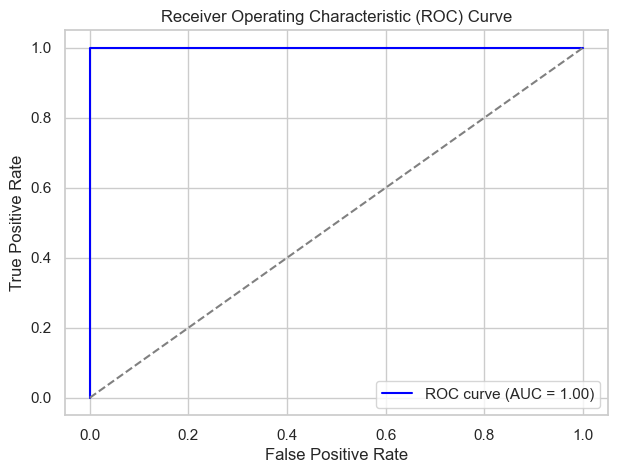

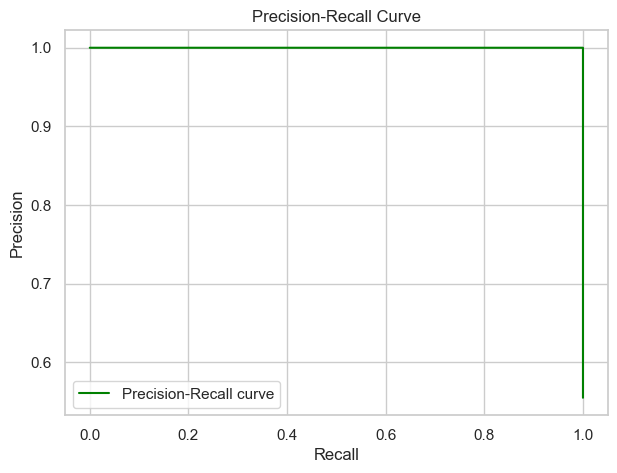

In [130]:
# # from pytorch_tabnet.tab_model import TabNetClassifier
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score

# # Predict probabilities for ROC and PR curves
# y_probs = tab_model.predict_proba(X_test)[:, 1]

# # ROC Curve
# fpr, tpr, _ = roc_curve(y_test, y_probs)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(7, 5))
# plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# # Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_test, y_probs)
# plt.figure(figsize=(7, 5))
# plt.plot(recall, precision, color='green', label='Precision-Recall curve')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.show()


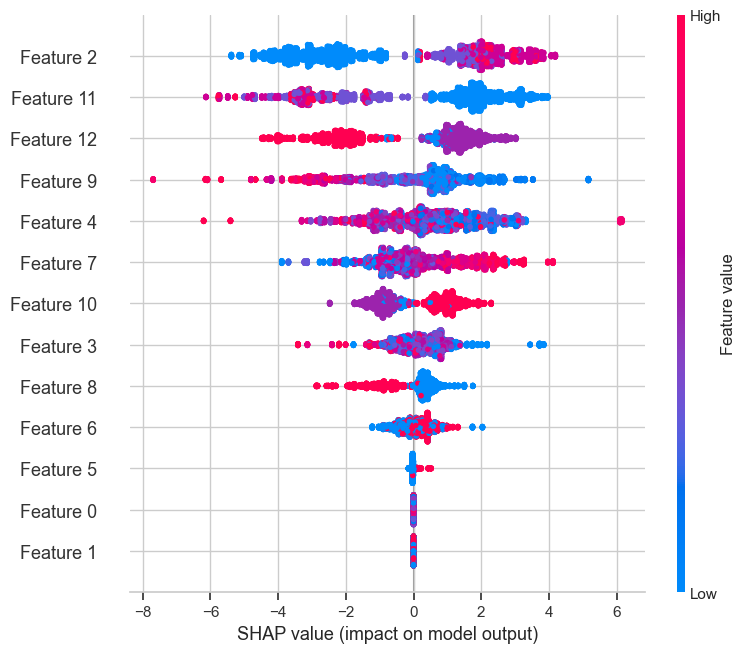

In [131]:
# explainer = shap.Explainer(xgb_model)
# shap_values = explainer(X_test)
# shap.summary_plot(shap_values, X_test)

<>:82: SyntaxWarning: invalid escape sequence '\H'
<>:82: SyntaxWarning: invalid escape sequence '\H'
C:\Users\PARTHO\AppData\Local\Temp\ipykernel_1984\2235127723.py:82: SyntaxWarning: invalid escape sequence '\H'
  df= pd.read_csv('F:\Hypertension Plos one\Dataset\Hyper.csv')
f:\Hypertension Plos one\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:51:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 11419, number of negative: 9447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 20866, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547254 -> initscore=0.189581
[LightGBM] [Info] Start training from score 0.189581


f:\Hypertension Plos one\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:51:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 11419, number of negative: 9447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 20866, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547254 -> initscore=0.189581
[LightGBM] [Info] Start training from score 0.189581


f:\Hypertension Plos one\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
f:\Hypertension Plos one\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


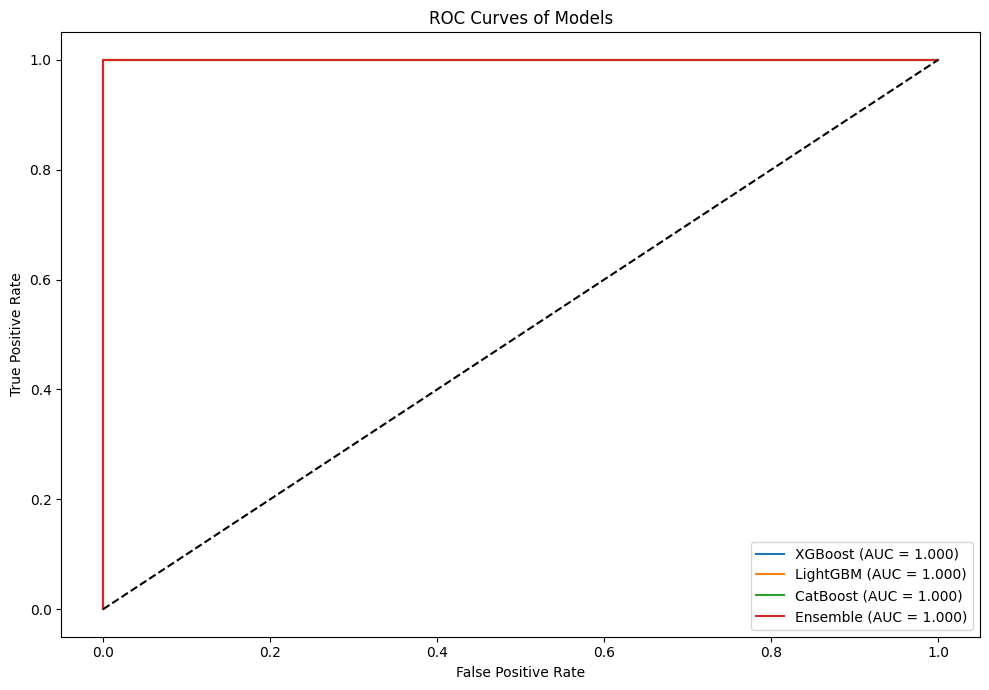

In [4]:
# import xgboost as xgb
# import lightgbm as lgb
# import catboost as cb
# from pytorch_tabnet.tab_model import TabNetClassifier
# import shap
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Load dataset (assuming df is preprocessed already)
# X = df.drop(columns=['target'])  # Replace 'target' with actual target column name
# y = df['target']

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Standardizing the dataset
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # XGBoost Classifier
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgb_model.fit(X_train, y_train)
# xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# # LightGBM Classifier
# lgb_model = lgb.LGBMClassifier()
# lgb_model.fit(X_train, y_train)
# lgb_prob = lgb_model.predict_proba(X_test)[:, 1]

# # CatBoost Classifier
# cat_model = cb.CatBoostClassifier(verbose=0)
# cat_model.fit(X_train, y_train)
# cat_prob = cat_model.predict_proba(X_test)[:, 1]

# # TabNet Classifier
# tab_model = TabNetClassifier()
# tab_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], patience=10)
# tab_prob = tab_model.predict_proba(X_test)[:, 1]

# # Plot AUC Curves
# plt.figure(figsize=(10, 7))
# models = {
#     "XGBoost": xgb_prob,
#     "LightGBM": lgb_prob,
#     "CatBoost": cat_prob,
#     "TabNet": tab_prob
# }

# for model_name, y_prob in models.items():
#     fpr, tpr, _ = roc_curve(y_test, y_prob)
#     auc_score = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

# plt.plot([0, 1], [0, 1], 'k--')  # Random model line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves of Different Models')
# plt.legend()
# plt.show()

# # SHAP Explainability for XGBoost
# explainer = shap.Explainer(xgb_model)
# shap_values = explainer(X_test)
# shap.summary_plot(shap_values, X_test)

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# --- Load your preprocessed DataFrame ---
# df = pd.read_csv("your_data.csv")  # Replace with actual dataset
#   first read the data file
df= pd.read_csv('F:\Hypertension Plos one\Dataset\Hyper.csv')
X = df.drop(columns=['target'])  # Replace 'target' if needed
y = df['target']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Standard Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Base Models ---
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)
cat_model = cb.CatBoostClassifier(verbose=0, random_state=42)

# --- Fit Models Individually ---
xgb_model.fit(X_train_scaled, y_train)
lgb_model.fit(X_train_scaled, y_train)
cat_model.fit(X_train_scaled, y_train)

# --- Ensemble Voting Classifier (Soft) ---
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    voting='soft'
)
ensemble.fit(X_train_scaled, y_train)

# --- Save Ensemble and Scaler ---
joblib.dump(ensemble, 'ensemble_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# --- ROC Curve Plotting ---
plt.figure(figsize=(10, 7))
models = {
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "CatBoost": cat_model,
    "Ensemble": ensemble
}

for model_name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Models')
plt.legend()
plt.tight_layout()
plt.savefig("ROC_Curves.png", dpi=300)
plt.show()



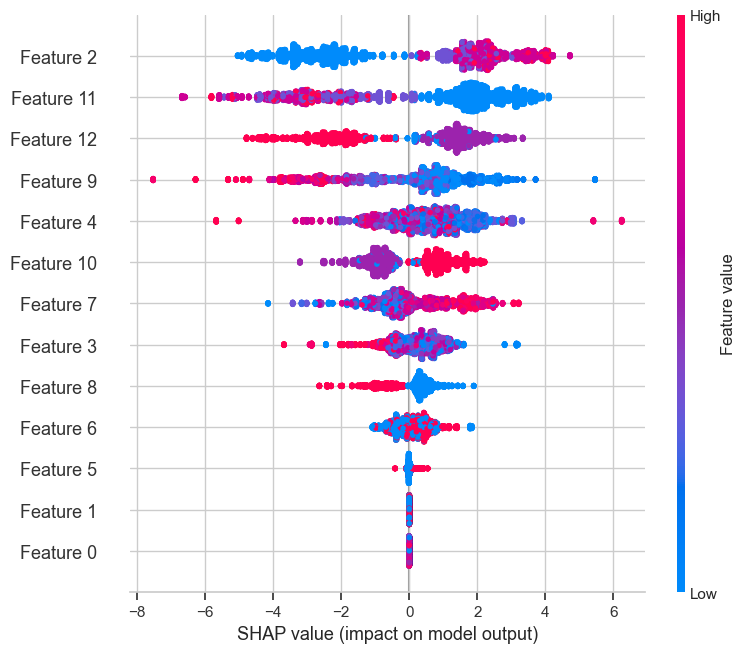

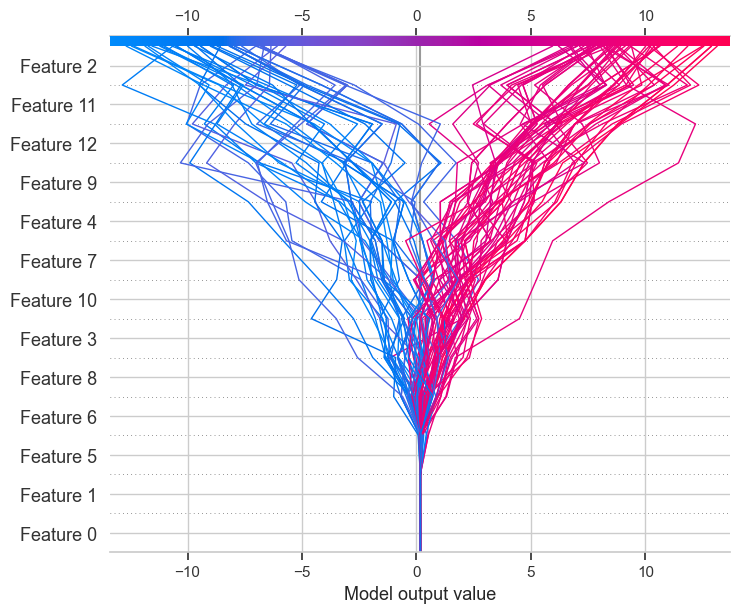

In [133]:
# # SHAP Explainability for XGBoost
# explainer = shap.Explainer(xgb_model)
# shap_values = explainer(X_test)
# shap.summary_plot(shap_values, X_test)
# shap.decision_plot(explainer.expected_value, shap_values.values[:100], X_test[:100])


In [134]:
# import lime
# import lime.lime_tabular

# # Create LIME explainer
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=X_train,
#     feature_names=X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])],
#     class_names=['Class 0', 'Class 1'],
#     mode='classification'
# )

# # Explain a single instance (first test sample)
# i = 0
# exp = explainer.explain_instance(X_test[i], xgb_model.predict_proba, num_features=10)

# # Display LIME explanation
# exp.show_in_notebook(show_table=True)
# exp.save_to_file('lime_xgboost_explanation.html')
